# Assignment requirements
Home Exercise: Exploratory Data Analysis (EDA) and basic ML Objective:
The objective of this exercise is to perform exploratory data analysis (EDA) on a given dataset and demonstrate your ML skills. You are required to generate meaningful visualizations to gain insights into the data. Be creative and thorough, explain your steps and suggest relevant solutions. 
Dataset:
The dataset provided contains information about customers of a retail store. It includes the following columns:
	Customer_ID: Unique identifier for each customer.
	Age: Age of the customer.
	Gender: Gender of the customer (categorical: 'Male' or 'Female').
	Income: Annual income of the customer (continuous).
	Spending_Score: Spending score of the customer (continuous).
Tasks:
1.	Load the dataset.
2.	Perform data cleaning and preprocessing if necessary.
3.	Explore the distribution of Age, Income, and Spending_Score using appropriate visualization techniques.
4.	Visualize the distribution of Gender using a bar chart or pie chart.
5.	Calculate the correlation coefficient between all features, what can you deduce?
6.	Generate a visualization to illustrate the relationship between Income and Gender.
7.	Convert the following problem to a classification problem (the label is Spending Score), how is it done? What is under your consideration?
8.	Please train a model to predict the new spending score, elaborate in the process (model selection, feature engineering, feature selection, cross-validation, etc.)
9.	Give all the relevant metrics.
10.	Bonus1: Bayesian statistics. Calculate prior probabilities (you can use any data source) and insert it to your model, does it improve your prediction?
11.	Bonus2: encapsulate your training phase and the prediction phase into a python class, add relevant unit-tests.


Deliverables:
	Python Notebook containing code for data loading, preprocessing, visualization, and all your 
	calculations.
	Visualizations (plots, charts, etc.) generated during the analysis.
	A brief report (1-2 paragraphs) summarizing your findings and insights from your work.
Additional Notes:
* Feel free to use any libraries or tools you're comfortable with for data analysis and visualization (e.g., pandas, matplotlib, seaborn, ggplot2, etc.).
* Ensure that your code is well-documented and easy to understand.
* Provide comments explaining your thought process and any assumptions made during the analysis.
* Aim for clarity and coherence in your visualizations, making them suitable for a non-technical audience.
This exercise will not only assess your skills in data analysis and visualization but also your ability to communicate insights effectively. Good luck!


In [1]:
#DF setup
import pandas as pd
import numpy as np
#visualization setup
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#math
import math
from scipy import stats
#ML:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Why load with "Unnamed: 0" col:
We could have loaded directly without the indexes(df = pd.read_csv('customer_data.csv', index_col=0)), of course, 
but I wanted to explain the difference between the columns(why do I leave "customer_id" and not "Unnamed: 0").

In [3]:
df = pd.read_csv('customer_data.csv', header=0, sep=',')
df

,Unnamed: 0,customer_id,ages,genders,incomes,spending_scores,age
0,0,1,56,Female,70277.0,15.0,NaN
1,1,2,69,Female,47084.0,29.0,NaN
2,2,3,46,Male,45146.0,100.0,NaN
3,3,4,32,Male,68004.0,74.0,NaN
4,4,5,60,Male,42134.0,28.0,NaN
...,...,...,...,...,...,...,...
9995,9995,9996,38,Female,80597.0,2.0,NaN
9996,9996,9997,23,Male,62056.0,53.0,NaN
9997,9997,9998,18,Male,28556.0,16.0,NaN
9998,9998,9999,21,Male,73137.0,10.0,NaN


#  2. Knowing the data and cleaning

## Unnamed: 0 VS customer_id
We can see from looking at the df that "Unnamed: 0" is counting the inedx, we dont need it as we get it from pandas..

On the other hand, "customer_id" represents the customer's joining number to the company, currently it corresponds to the number of our indexes in the table but there may be a case where the data will be in a different order and in such a case it may be that a certain person will be in index 5 but he joined the company as the 200th customer, so we would like to keep this column.
In addition, we would like to keep this column because it might be able to point us to trends (for example: the first 70 customers were the richest and since then people from the middle class are joining..)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10000 non-null  int64  
 1   customer_id      10000 non-null  int64  
 2   ages             10000 non-null  int64  
 3   genders          9980 non-null   object 
 4   incomes          9980 non-null   float64
 5   spending_scores  9980 non-null   float64
 6   age              10 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [5]:
df.describe()

,Unnamed: 0,customer_id,ages,incomes,spending_scores,age
count,10000.00000,10000.00000,10000.000000,9980.000000,9980.000000,10.000000
mean,4999.50000,5000.50000,48.798400,49785.162926,50.697695,7.000000
std,2886.89568,2886.89568,17.903223,14853.618343,28.978737,5.517648
min,0.00000,1.00000,18.000000,-10810.000000,1.000000,1.000000
25%,2499.75000,2500.75000,34.000000,39542.750000,26.000000,2.000000
50%,4999.50000,5000.50000,49.000000,49782.500000,51.000000,6.500000
75%,7499.25000,7500.25000,64.000000,59825.750000,76.000000,11.000000
max,9999.00000,10000.00000,79.000000,99765.000000,194.000000,17.000000


## age
As we can see the column of the age value is not relevant, because it contains only 10 values that are not
NULL out of 10000 rows which means that there is a representation of 1% of our data and therefore reliable
information cannot necessarily be deduced from it

In [6]:
df2 = df.copy()

In [7]:
cols_to_drop = ['Unnamed: 0', 'age']
df2.drop(cols_to_drop, axis=1, inplace=True)

In [8]:
df2

,customer_id,ages,genders,incomes,spending_scores
0,1,56,Female,70277.0,15.0
1,2,69,Female,47084.0,29.0
2,3,46,Male,45146.0,100.0
3,4,32,Male,68004.0,74.0
4,5,60,Male,42134.0,28.0
...,...,...,...,...,...
9995,9996,38,Female,80597.0,2.0
9996,9997,23,Male,62056.0,53.0
9997,9998,18,Male,28556.0,16.0
9998,9999,21,Male,73137.0,10.0


## Duplicates in data
We would like to make sure that we do not have duplicate data because then this could mislead our models and tests later (if there is one user in reality and he exists in duplicates in our table, this will give his data an excessive weight that does not necessarily reflect reality).

We will focus our test on the customer_id variable because it is a unique variable and if we find duplicates in it it will necessarily be incorrect (compared to duplicates in the age variable where it is very logical to have several people of the same ages..)

In [9]:
duplicated_values = df2[df2['customer_id'].duplicated()]['customer_id'].sum()
print(duplicated_values)

0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      10000 non-null  int64  
 1   ages             10000 non-null  int64  
 2   genders          9980 non-null   object 
 3   incomes          9980 non-null   float64
 4   spending_scores  9980 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


## missing values
we can see that we have 20 missing values in "incomes", "genders" and "spending_scores" (60 missing values combine) also We can see that both columns "incomes" and "spending_scores" contain variables numeric - continuous compared to a "genders" column that contains an object type variable - categorical.

### Let's start by dealing with continuous variables
We have several options to handle missing data from type numerical - continuous data (average, median, ffill, bfill, delete, entering a value that serves as a marker that indicates a missing data, etc..), We will use the relevant way for us.

In [11]:
df2.describe()

,customer_id,ages,incomes,spending_scores
count,10000.00000,10000.000000,9980.000000,9980.000000
mean,5000.50000,48.798400,49785.162926,50.697695
std,2886.89568,17.903223,14853.618343,28.978737
min,1.00000,18.000000,-10810.000000,1.000000
25%,2500.75000,34.000000,39542.750000,26.000000
50%,5000.50000,49.000000,49782.500000,51.000000
75%,7500.25000,64.000000,59825.750000,76.000000
max,10000.00000,79.000000,99765.000000,194.000000


### Choose the relevant way for us:
So as we can see the median and mean are equal in the relevant variables, it's a good indication that the data might be symmetrically distributed, and it could possibly be a normal distribution.<br>
lets test the assumption statistically:

In [12]:
def identify_distribution(column):
    skewness = column.skew()
    kurtosis = column.kurt()
    shapiro_test = stats.shapiro(column)
    ks_test = stats.kstest(column, 'uniform')

    if shapiro_test.pvalue > 0.05 and abs(skewness) < 0.5:
        print("The data follows a Normal Distribution")
    elif ks_test.pvalue > 0.05:
        print("The data follows a Uniform Distribution")
    elif kurtosis > 0.5:
        print("The data follows a Bimodal or Multimodal Distribution")
    else:
        print("The data does not follow a known distribution")

In [13]:
data = df2["incomes"]
distribution_type = identify_distribution(data)

The data follows a Normal Distribution


In [14]:
data = df2["spending_scores"]
distribution_type = identify_distribution(data)

The data follows a Normal Distribution


### Choose how to handle with missing values
We will fill in the missing values according to the median:

In [15]:
def replace_missing_values_with_median(df, colName):
    df[colName].fillna(df[colName].median(), inplace = True)

In [16]:
replace_missing_values_with_median(df2, 'incomes')
replace_missing_values_with_median(df2, 'spending_scores')

In [17]:
df2.describe()

,customer_id,ages,incomes,spending_scores
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.798400,49785.157600,50.698300
std,2886.89568,17.903223,14838.755804,28.949744
min,1.00000,18.000000,-10810.000000,1.000000
25%,2500.75000,34.000000,39560.250000,26.000000
50%,5000.50000,49.000000,49782.500000,51.000000
75%,7500.25000,64.000000,59797.000000,76.000000
max,10000.00000,79.000000,99765.000000,194.000000


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      10000 non-null  int64  
 1   ages             10000 non-null  int64  
 2   genders          9980 non-null   object 
 3   incomes          10000 non-null  float64
 4   spending_scores  10000 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


### Now lets handle "genders" column that contains an object type variable - categorical:
We have several options to handle missing data from type object - categorical (basics: Mode, ffill, bfill, delete, entering a value that serves as a marker that indicates a missing data, etc..
and more advanced methods that involve machine learning that predict the missing value), We will use the relevant way for us.

In [22]:
mode = df2['genders'].mode()[0]
print('The common variable is:', mode)
df2['genders'].fillna(mode, inplace=True)

The common variable is: Male


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      10000 non-null  int64  
 1   ages             10000 non-null  int64  
 2   genders          10000 non-null  object 
 3   incomes          10000 non-null  float64
 4   spending_scores  10000 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


## Discrete value to numeric value
As we can see, in the genders column we have a variable of type '<b>name</b>/order/space/portion' which is a discrete variable and we would like to turn it into a binary representation which is a numeric variable.

### Why would we do this?
Some analyzes may require coding of name or ordinal variables as numerical values.
Also, most machine learning models are designed to work with numeric variables. This is because these models involve mathematical computations, which require numeric inputs(Linear Regression, KNN, etc..)

In [24]:
df2 = pd.get_dummies(df2, columns=['genders'], prefix = ['genders'])
df2

,customer_id,ages,incomes,spending_scores,genders_Female,genders_Male
0,1,56,70277.0,15.0,1,0
1,2,69,47084.0,29.0,1,0
2,3,46,45146.0,100.0,0,1
3,4,32,68004.0,74.0,0,1
4,5,60,42134.0,28.0,0,1
...,...,...,...,...,...,...
9995,9996,38,80597.0,2.0,1,0
9996,9997,23,62056.0,53.0,0,1
9997,9998,18,28556.0,16.0,0,1
9998,9999,21,73137.0,10.0,0,1


### Stick to the minimum necessary
now we see we have 6 columns, we replace the genders col with genders_Female and genders_Male.
but its binary so we can use only one column

In [25]:
df2.drop("genders_Male", axis=1, inplace=True)
df2.head(20)

,customer_id,ages,incomes,spending_scores,genders_Female
0,1,56,70277.0,15.0,1
1,2,69,47084.0,29.0,1
2,3,46,45146.0,100.0,0
3,4,32,68004.0,74.0,0
4,5,60,42134.0,28.0,0
5,6,25,50317.0,59.0,0
6,7,78,36176.0,73.0,0
7,8,38,75277.0,21.0,1
8,9,56,65727.0,10.0,0
9,10,75,47705.0,4.0,0


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      10000 non-null  int64  
 1   ages             10000 non-null  int64  
 2   incomes          10000 non-null  float64
 3   spending_scores  10000 non-null  float64
 4   genders_Female   10000 non-null  uint8  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 322.4 KB


## Outliers values
An outliers value does not have an unequivocal definition because it is always relative to the rest of the data, therefore a value can be considered outliers according to one method but be considered a completely normal value according to another method or other threshold values.

In addition, it is important to emphasize that an outliers value is not necessarily a wrong value in any case We will have to examine our data and the exceptions and then decide if they are wrong and handle accordingly.

There are many ways to define and find outliers values (by looking at graphs and plots for a single variable or for several variables at the same time/ using the distance from the median of the variable/ according to the standard deviation distances from the mean/ etc.) We will use the relevant way for us.

### looking at graphs and plots for a single variable or for several variables at the same time(also task 3)
For task 3(Explore the distribution) so for explore distribution we will use the seaborn library which provides high capabilities in visualization methods that demonstrate to us the distribution of data.
our three variables are of type: numeric - continuous, Histograms can be a good tool for examining distribution and so can the Kernel Plot

Text(0, 0.5, 'Number of customers')

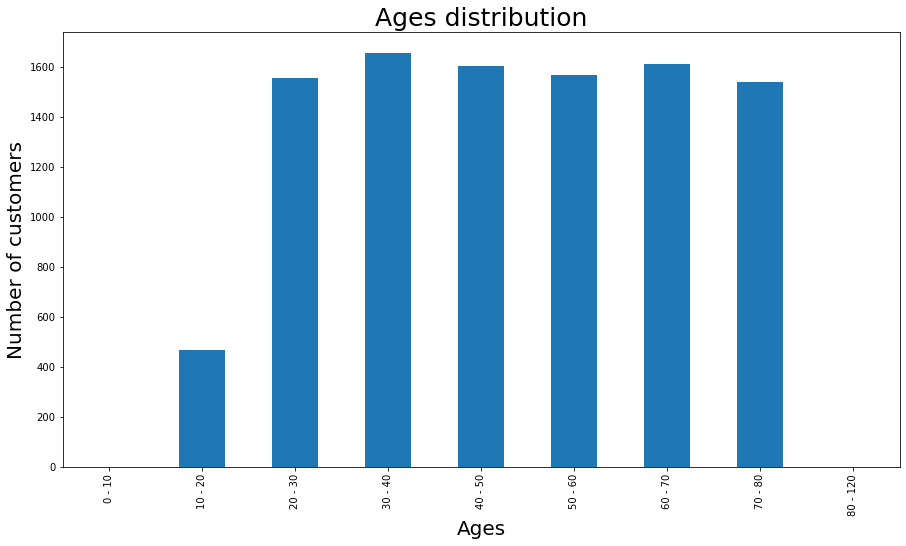

In [27]:
# Explore distribution of Age
titlefont = 25
subtitlefont = 20
figsize=(15, 8)

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 120]
labels = ["0 - 10", "10 - 20", "20 - 30", "30 - 40",
          "40 - 50", "50 - 60", "60 - 70", "70 - 80", "80 - 120"]
df2["ages_binned"] = pd.cut(df2['ages'], bins, labels=labels, include_lowest=True)

#ages
df2['ages_binned'].value_counts().sort_index().plot(kind='bar', figsize=figsize)
plt.title('Ages distribution', fontsize=titlefont)
plt.xlabel('Ages', fontsize=subtitlefont)
plt.ylabel('Number of customers', fontsize=subtitlefont)

In [28]:
df2[df2['ages'] % 10 == 0].head(15)#check the edges of the ages enter to right ages_binned

,customer_id,ages,incomes,spending_scores,genders_Female,ages_binned
4,5,60,42134.0,28.0,0,50 - 60
11,12,40,49522.0,4.0,0,30 - 40
15,16,70,46592.0,72.0,0,60 - 70
19,20,20,30775.0,49.0,0,10 - 20
21,22,70,30589.0,65.0,1,60 - 70
30,31,50,48792.0,72.0,1,40 - 50
54,55,20,57342.0,15.0,1,10 - 20
70,71,70,45754.0,28.0,0,60 - 70
109,110,40,54840.0,54.0,1,30 - 40
119,120,70,40258.0,82.0,1,60 - 70


### ages distribution graph conclusions
We can see that the distribution of values is distributed quite evenly among all the different values (exception only to 10 - 20 And the age ranges that have no customers at all) and so we currently have no added value from looking at this graph.
Let's try another graph

Text(0, 0.5, 'Density')

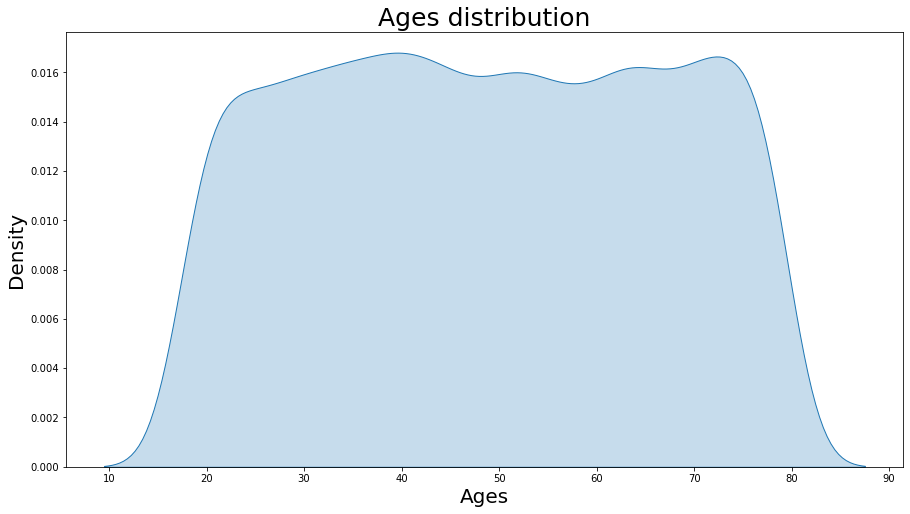

In [29]:
plt.figure(figsize=figsize)
sns.kdeplot(df2.ages, shade=True)
plt.title('Ages distribution', fontsize=titlefont)
plt.xlabel('Ages', fontsize=subtitlefont)
plt.ylabel('Density', fontsize=subtitlefont)

### ages distribution graph conclusions
As we can see in the graph, The shape of the curve reflects the distribution of the data and now you can clearly see that there is a normal (bell-shaped) distribution of the variable.<br>
Additionally there seems to be very little, if any, outlier data

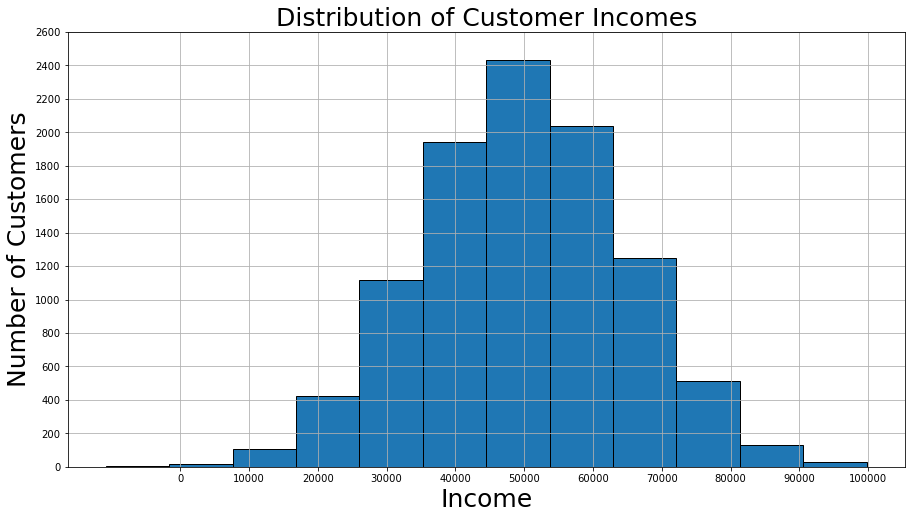

In [30]:
plt.figure(figsize=figsize)
plt.hist(df2['incomes'], bins=12, edgecolor='black')
plt.title('Distribution of Customer Incomes', fontsize=titlefont)
plt.xlabel('Income', fontsize=titlefont)
plt.ylabel('Number of Customers', fontsize=titlefont)
plt.yticks(range(0, 2750, 200))
plt.xticks(range(0, 100001, 10000))
plt.grid(True)
plt.show()

### Distribution of Customer Incomes graph conclusions
we can clearly see that there is a normal distribution here(bell shape), we can also see from the graph that there are outliers values(0 - 16,000 , 83,000 - 100,000{all of them 3 standard deviations from the mean}).

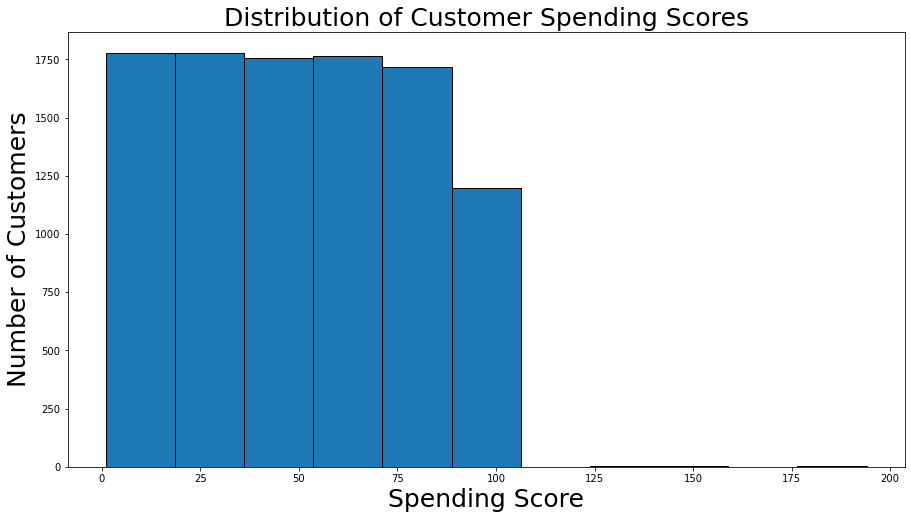

In [134]:
plt.figure(figsize=figsize)
plt.hist(df2['spending_scores'], bins=11, edgecolor='black')
plt.title('Distribution of Customer Spending Scores', fontsize=titlefont)
plt.xlabel('Spending Score', fontsize=titlefont)
plt.ylabel('Number of Customers', fontsize=titlefont)
plt.grid(False)
plt.show()

### Distribution of Customer Spending Scores graph conclusions
It looks like we got another common data distribution where the data graph is skewed to the left.<br>
In addition, it seems that there are some outliers values from the number 155 and above

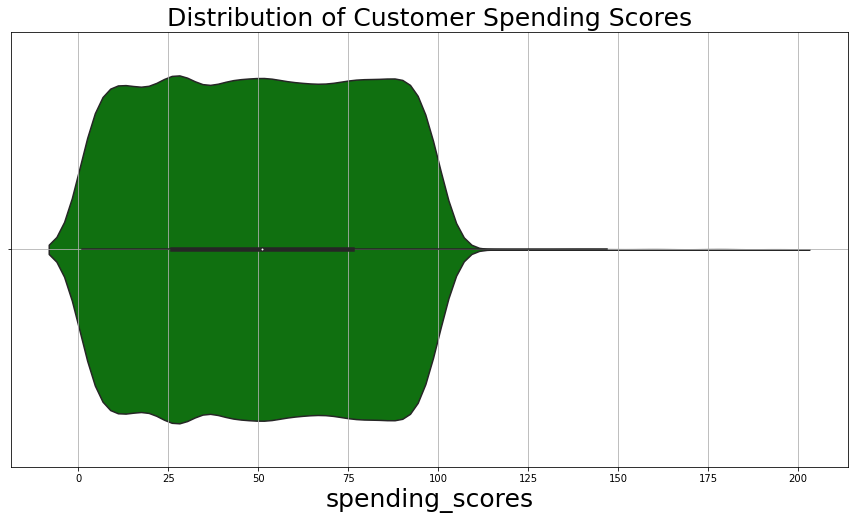

In [135]:
plt.figure(figsize=figsize)
plt.xlabel('Spending Score', fontsize=titlefont)
plt.title('Distribution of Customer Spending Scores', fontsize=titlefont)
plt.xticks(range(0, 201, 25))
sns.violinplot(df2.spending_scores, color='green')
plt.grid(True)

### Distribution of Customer Spending Scores graph conclusions
Violinplot graph - a violin graph is a <b>hybrid of a box plot with a density kernel</b>. Instead of the Box Plot in the Violin Plot there will be a density graph for each category. This is a more informative graph than a box plot because we see the distribution of all the values. This is especially important when the data is not normally distributed. And we should very well recognize this. For example, if the values of the variable are distributed around two central values and not around one central value(here, of course, this will not be fully reflected since we are testing one variable).<br><br>
As we can see in the violinplot graph the distribution of the absolute majority of the values is between 0 and 100 in a common way of the graph sailing to the left.<br>
In addition, it is now possible to clearly see the extreme values beyond the IQR whiskers as we suspected(values < 0 and values > 145).

In [31]:
#now lets handle the outliers:
def Clearing_Outliers_By_Standard_Deviation_From_The_Mean(df, colName):
    z_score = (df[colName] - df[colName].mean()) / df[colName].std()
    outliers = abs(z_score) > 3
    sumOutliers = sum(outliers)
    print(f'Found {sumOutliers} outliers')
    if(sumOutliers > 0):
        print(f'the min outlier is: {min(df[colName][outliers])}, and the max outlier is: {max(df[colName][outliers])}')
        df[colName][outliers] = np.nan
        print(f'now have {df[colName].isna().sum()} nans')
        replace_missing_values_with_median(df, colName)
        print(f'now have {df[colName].isna().sum()} nans and no outliers')

In [32]:
Clearing_Outliers_By_Standard_Deviation_From_The_Mean(df2, 'ages')

Found 0 outliers


In [33]:
Clearing_Outliers_By_Standard_Deviation_From_The_Mean(df2, 'incomes')

Found 23 outliers
the min outlier is: -10810.0, and the max outlier is: 99765.0
now have 23 nans
now have 0 nans and no outliers


In [34]:
def Clearing_Outliers_By_IQR(df, colName):
    Q1 = np.percentile(df[colName], 25)
    Q3 = np.percentile(df[colName], 75)
    IQR = Q3 - Q1
    
    df[colName][(df[colName] < Q1 - 1.5 * IQR) | (df[colName] > Q3 + 1.5 * IQR)] = np.nan
    print(f'now have {df[colName].isna().sum()} nans')
    replace_missing_values_with_median(df, colName)
    print(f'now have {df[colName].isna().sum()} nans and no outliers')

In [35]:
Clearing_Outliers_By_IQR(df2, 'spending_scores')

now have 5 nans
now have 0 nans and no outliers


### End of task 2 and 3 :-)

# Task 4
The variable Gender is originally a categorical variable of the nominal type(We changed it at the beginning to a numerical value that will be more convenient to work with later, but the numbers are just coding and it is of course still a variable of the numerical - discrete(represents categorical) type), so of course we were required to present it in a bar or a pie.

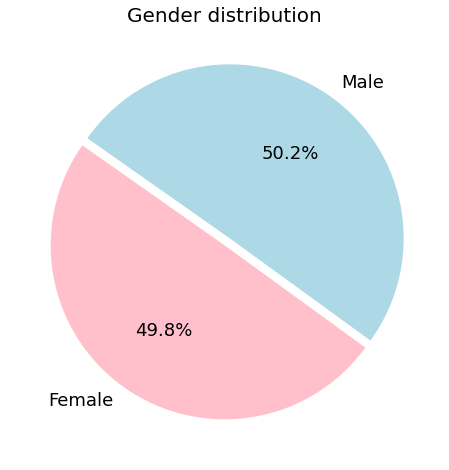

In [36]:
titlefont = 20
subtitlefont = 20
figsize=(14, 8)
plt.figure(figsize=figsize)

labels = ["Male", "Female"]
overall_ratios = [df2['genders_Female'].value_counts()[0], df2['genders_Female'].value_counts()[1]]
explode = [0.05, 0]
textprops = {'fontsize': 18}
data = df2['genders_Female'].value_counts()
angle = -180 * 0.20
colors = ['lightblue', 'pink']

plt.pie(data, autopct='%1.1f%%', startangle=angle, labels=labels, explode=explode, textprops=textprops, colors=colors)
plt.title("Gender distribution", fontsize=titlefont)
print()

# Task 5 correlation coefficient between all features

In [37]:
def show_pairwise_correlations_numeric_only(df):
    numeric_cols = df.select_dtypes(include=[np.number])

    for col1 in numeric_cols.columns:
        for col2 in numeric_cols.columns:
            if col1 != col2:
                correlation = numeric_cols[col1].corr(numeric_cols[col2])
                if(abs(correlation) > 0.35):
                    print(f"Correlation between {col1} and {col2}: {correlation:.2f}")

In [38]:
show_pairwise_correlations_numeric_only(df2)

### The Pearson correlation
The Pearson correlation coefficient is designed to measure the linear relationship between two continuous variables.
in our case the the relevant variables are: ages, incomes, spending_scores.

We can conclude that the <b>linear relationship between them is extremely small to non-existent</b>.<br><br>
Important highlights:<br>
1. There is no linear relationship between them, but this does not mean that there is no relationship at all, it may be that there is a parabolic relationship or other types of relationships that Pearson's correlation can exceed, and there is also the possibility that there is indeed no relationship between them.<br>
2. Additionally for categorical or ordinal variables, consider using other measures of association, such as the chi-square test for independence or Spearman's rank correlation coefficient.

# Task 6 relationship between Income and Gender
Now we are going to test a relationship between a continuous numerical variable (income) and a variable that was categorical - of the nominal type and we turned it into a numerical variable of the nominal type (gender)

A good way to do this would be using a boxplot

Text(0.5, 1.0, 'Gender vs Incomes')

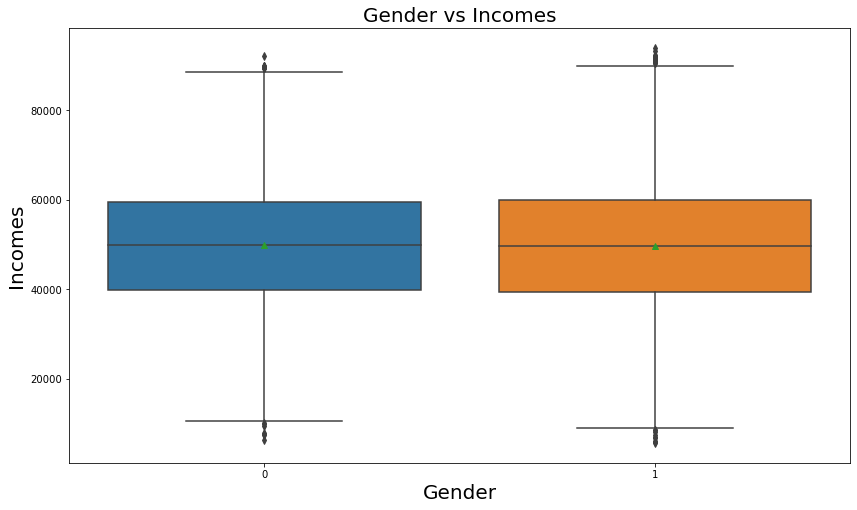

In [40]:
titlefont = 20
subtitlefont = 20
figsize=(14, 8)
plt.figure(figsize=figsize)
g = sns.boxplot(y="incomes", x="genders_Female", showmeans=True, data=df2)
plt.xlabel('Gender', fontsize=titlefont)
plt.ylabel('Incomes', fontsize=titlefont)
plt.title("Gender vs Incomes", fontsize=titlefont)

In [41]:
print(max(df2['incomes']))
print(min(df2['incomes']))

94018.0
5637.0


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   customer_id      10000 non-null  int64   
 1   ages             10000 non-null  int64   
 2   incomes          10000 non-null  float64 
 3   spending_scores  10000 non-null  float64 
 4   genders_Female   10000 non-null  uint8   
 5   ages_binned      10000 non-null  category
dtypes: category(1), float64(2), int64(2), uint8(1)
memory usage: 332.5 KB


In [43]:
"""
Converting a continuous value to a discrete value as we did with ages for It will
be convenient to show the data to non-technologists
"""
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
labels = ["0 - 10000", "10000 - 20000", "20000 - 30000", "30000 - 40000",
          "40000 - 50000", "50000 - 60000", "60000 - 70000", "70000 - 80000", "80000 - 90000",
         "90000 - 100000"]

df2["incomes_binned"] = pd.cut(df2['incomes'], bins, labels=labels, include_lowest=True)

In [44]:
df2.head(15)#check the edges of the ages enter to right ages_binned

,customer_id,ages,incomes,spending_scores,genders_Female,ages_binned,incomes_binned
0,1,56,70277.0,15.0,1,50 - 60,70000 - 80000
1,2,69,47084.0,29.0,1,60 - 70,40000 - 50000
2,3,46,45146.0,100.0,0,40 - 50,40000 - 50000
3,4,32,68004.0,74.0,0,30 - 40,60000 - 70000
4,5,60,42134.0,28.0,0,50 - 60,40000 - 50000
5,6,25,50317.0,59.0,0,20 - 30,50000 - 60000
6,7,78,36176.0,73.0,0,70 - 80,30000 - 40000
7,8,38,75277.0,21.0,1,30 - 40,70000 - 80000
8,9,56,65727.0,10.0,0,50 - 60,60000 - 70000
9,10,75,47705.0,4.0,0,70 - 80,40000 - 50000


In [45]:
ct = pd.crosstab(df2['genders_Female'], df2['incomes_binned'])
ct.index = ['Male', 'Female']
ct

incomes_binned,0 - 10000,10000 - 20000,20000 - 30000,30000 - 40000,40000 - 50000,50000 - 60000,60000 - 70000,70000 - 80000,80000 - 90000,90000 - 100000
Male,5,101,336,848,1255,1268,791,327,93,1
Female,12,87,362,841,1236,1213,772,357,80,15


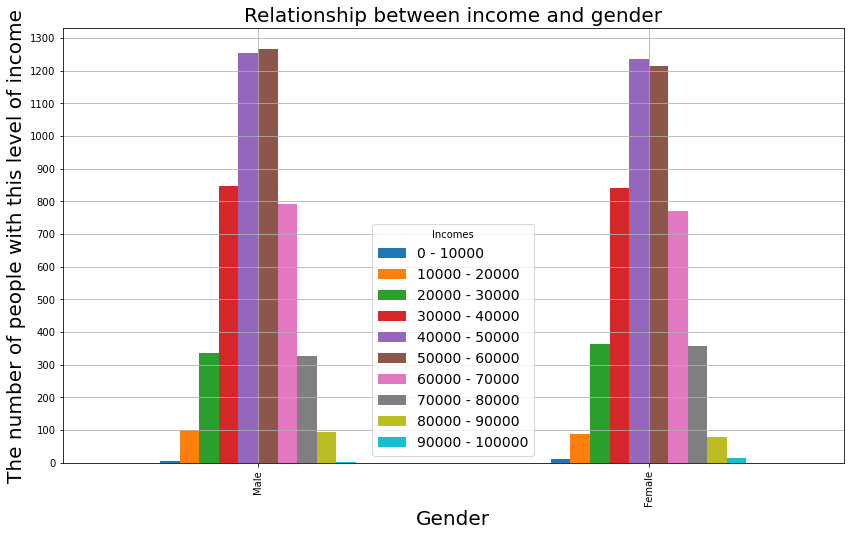

In [46]:
g = ct.plot(kind='bar', figsize=figsize)
plt.title("Relationship between income and gender", fontsize=titlefont)
plt.xlabel('Gender', fontsize=titlefont)
plt.ylabel('The number of people with this level of income', fontsize=subtitlefont)
plt.yticks(range(0, 1301, 100))
plt.grid(True)
g.legend(title="Incomes", fontsize=14)

# Task 7: classification problem (Spending Score)
So right now we're going to solve the classification problem for the variable Spending Score The question we need to answered right now is: given early information about a customer of a retail store, can we predict how many points he will spend in our store?

But we were asked to turn the problem into a problem with a label, meaning a Supervised Learning problem and there we were asked to solve a classification problem, hence we have to turn our variable into a categorical variable.

And now lets formulate a new question:
given early information about a customer of a retail store, can we predict the value range group he will enter from a finite number of groups?

First lets look again on spending_scores

In [47]:
df2.describe()

,customer_id,ages,incomes,spending_scores,genders_Female
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.798400,49782.483750,50.636800,0.497500
std,2886.89568,17.903223,14658.166514,28.816633,0.500019
min,1.00000,18.000000,5637.000000,1.000000,0.000000
25%,2500.75000,34.000000,39604.500000,26.000000,0.000000
50%,5000.50000,49.000000,49782.500000,51.000000,0.000000
75%,7500.25000,64.000000,59761.500000,76.000000,1.000000
max,10000.00000,79.000000,94018.000000,147.000000,1.000000


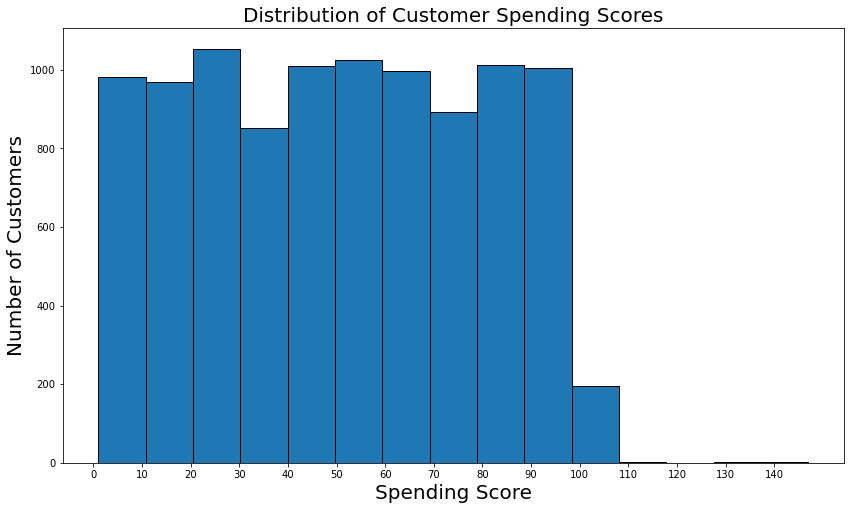

In [48]:
plt.figure(figsize=figsize)
plt.hist(df2['spending_scores'], bins=15, edgecolor='black')
plt.title('Distribution of Customer Spending Scores', fontsize=titlefont)
plt.xlabel('Spending Score', fontsize=titlefont)
plt.xticks(range(0, 150, 10))
plt.ylabel('Number of Customers', fontsize=titlefont)
plt.grid(False)
plt.show()

### Preparing the buckets and turning the continuous variable into categorical
According to the information in the graph, we build the buckets that will capture the trends as accurately as possible (in addition, I presented the graph divided into a different number of buckets in order to see how it affects the distribution)

In [49]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 150]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df2["spending_scores_binned"] = pd.cut(df2['spending_scores'], bins, labels=labels, include_lowest=True)

In [50]:
df2[df2['spending_scores'] % 10 == 0].head(20)#make sure the edges enter where they need to

,customer_id,ages,incomes,spending_scores,genders_Female,ages_binned,incomes_binned,spending_scores_binned
2,3,46,45146.0,100.0,0,40 - 50,40000 - 50000,8
8,9,56,65727.0,10.0,0,50 - 60,60000 - 70000,0
13,14,28,26797.0,90.0,1,20 - 30,20000 - 30000,7
14,15,41,66240.0,80.0,0,40 - 50,60000 - 70000,6
23,24,41,53788.0,50.0,1,40 - 50,50000 - 60000,3
28,29,77,80048.0,70.0,1,70 - 80,80000 - 90000,5
38,39,44,57665.0,30.0,0,40 - 50,50000 - 60000,1
41,42,45,70014.0,20.0,1,40 - 50,70000 - 80000,0
44,45,32,67825.0,60.0,0,30 - 40,60000 - 70000,4
49,50,68,78697.0,40.0,0,60 - 70,70000 - 80000,2


# Task 8: train a model
So now we'll prepare our DF to work with machine learning algorithms, it's almost ready, we'll just download the duplicates of the data we created in duplicate columns and leave what we need

In [51]:
def split_to_train_and_test(dataset, label_column, test_ratio, rand_state):
    col=dataset.columns.drop(label_column)
    X=dataset[col]
    y=dataset[label_column]
    XTrain,XTest,yTrain,yTest=train_test_split(X,y,random_state=rand_state,test_size=test_ratio)
    return XTrain,XTest,yTrain,yTest

In [52]:
test_ratio, rand_state = 0.2, 42
category_col_name = 'spending_scores_binned'

cols_to_drop = ['ages_binned', 'incomes_binned', "spending_scores"]
dfToML = df2.drop(cols_to_drop, axis=1)
X_train, X_test, y_train, y_test = split_to_train_and_test(dfToML, category_col_name, test_ratio, rand_state)
print(f'Shape of X_train is: {X_train.shape}, Shape of y_train is: {y_train.shape}')#as we wanted.

Shape of X_train is: (8000, 4), Shape of y_train is: (8000,)


In [53]:
dfToML

,customer_id,ages,incomes,genders_Female,spending_scores_binned
0,1,56,70277.0,1,0
1,2,69,47084.0,1,1
2,3,46,45146.0,0,8
3,4,32,68004.0,0,6
4,5,60,42134.0,0,1
...,...,...,...,...,...
9995,9996,38,80597.0,1,0
9996,9997,23,62056.0,0,4
9997,9998,18,28556.0,0,0
9998,9999,21,73137.0,0,0


### Choosing a machine learning algorithm for our model
Since we checked earlier and did not find a relationship between the different variables, we will try to use the <b>Naive Bayes</b> algorithm, since it is called that because we naively assume that the variables are independent, and here we also saw that they are not linearly dependent, so there is a greater chance that they are indeed independent (which is a little better than naivety absolute :-)

In [107]:
def print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred):
    print('Accuracy on Train data =', metrics.accuracy_score(y_train, y_pred_train))
    print('Accuracy on test  data =', metrics.accuracy_score(y_test, y_pred))
    print('f1 score on Train data =', metrics.f1_score(y_train, y_pred_train, average='macro'))
    print('f1 score on test data =', metrics.f1_score(y_test, y_pred, average='macro'))

In [121]:
def cross_val_accuracy_f1_score(model, X_test, y_test, cv = 10):
    eva_Accuracy = cross_val_score(model, X_test, y_test, cv = cv, scoring=make_scorer(metrics.accuracy_score,
                                                                                         greater_is_better=True))
    print(f'eva of Accuracy is: {eva_Accuracy}')
    eva_f1 = cross_val_score(model, X_test, y_test, cv = cv, scoring=make_scorer(metrics.f1_score,
                                                                        greater_is_better=True, average='macro'))
    print(f'eva of f1 is: {eva_f1}')

In [122]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred)
cross_val_accuracy_f1_score(gnb, X_test, y_test)

Accuracy on Train data = 0.194125
Accuracy on test  data = 0.1995
f1 score on Train data = 0.12045383158355621
f1 score on test data = 0.033263859941642354
eva of Accuracy is: [0.175 0.185 0.2   0.205 0.195 0.205 0.21  0.205 0.205 0.2  ]
eva of f1 is: [0.0339641  0.03606238 0.0379867  0.04605551 0.03672316 0.05717616
 0.06535719 0.04701011 0.05792972 0.0408838 ]


### Evaluation results Naive Bayes
We currently have the best results in the index:<br>
Accuracy(0.21 in cross_val) - on both the training table and the test table. ((Tp + Tn) \ (Tp + Tn + Fp + Fn)).

lets try other algoritems that can handle with that kind of ML to see if we can get higher result before we try do 
feature engineering.<br>
<b>Start with KNN</b>

In [123]:
def fit_and_print_knn(clf, X_train, y_train, X_Test, y_Test):
    clf.fit(X_train, y_train)
    best_knn = clf.best_estimator_
    y_pred = best_knn.predict(X_test)
    y_pred_train = best_knn.predict(X_train)
    print('Best K:', best_knn.n_neighbors)
    print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred)
    cross_val_accuracy_f1_score(best_knn, X_Test, y_Test)

In [124]:
def traning_KNN_clf_f1_accuracy(X_train, y_train, X_Test, y_Test, parameters):
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True, average='macro'))#f1
    print('------------The parameter is chosen by *f1* score test------------')
    fit_and_print_knn(clf, X_train, y_train, X_Test, y_Test)
    print('------------The parameter is chosen by *accuracy* score test------------')
    clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    fit_and_print_knn(clf, X_train, y_train, X_Test, y_Test)

In [125]:
def find_best_k_for_KNN(X_train, y_train, X_Test, y_Test, num_of_rows_in_real_table):
    max_k = int(math.sqrt(num_of_rows_in_real_table))
    parameters = {'n_neighbors':range(3, max_k, 2) }
    traning_KNN_clf_f1_accuracy(X_train, y_train, X_Test, y_Test, parameters) 

In [126]:
find_best_k_for_KNN(X_train, y_train, X_test, y_test, df2.shape[0])

------------The parameter is chosen by *f1* score test------------
Best K: 7
Accuracy on Train data = 0.34225
Accuracy on test  data = 0.122
f1 score on Train data = 0.249017407786799
f1 score on test data = 0.07934268056724718
eva of Accuracy is: [0.115 0.135 0.125 0.135 0.14  0.13  0.15  0.15  0.16  0.155]
eva of f1 is: [0.0856008  0.10064387 0.07975315 0.10523594 0.10352285 0.08182131
 0.0974757  0.11919452 0.09282828 0.1026244 ]
------------The parameter is chosen by *accuracy* score test------------
Best K: 99
Accuracy on Train data = 0.196125
Accuracy on test  data = 0.1835
f1 score on Train data = 0.0626936575234717
f1 score on test data = 0.055222505830874125
eva of Accuracy is: [0.195 0.19  0.215 0.185 0.18  0.175 0.195 0.205 0.175 0.17 ]
eva of f1 is: [0.07147508 0.06993831 0.07335421 0.06120075 0.06208113 0.06149648
 0.0717094  0.07211742 0.06323615 0.04426191]


### Evaluation results KNN
Here as you can see we reached quite similar results but we managed to achieve a small improvement with k = 99 in Accuracy score: (0.215 > 0.21 {with cross_val}).

now ill try <b>decision_tree</b>

In [141]:
def fit_and_print_dt(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    best_dt = clf.best_estimator_
    y_pred = best_dt.predict(X_test)
    y_pred_train = best_dt.predict(X_train)
    print('Best parameters:', clf.best_params_)
    print('Best score:', clf.best_score_)
    print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred)
    cross_val_accuracy_f1_score(best_dt, X_test, y_test)

In [142]:
def find_best_decision_tree_params(X_train, y_train, X_test, y_test, number_of_rows):
    max_min_samples = int(number_of_rows * 8 / 100) #8% of intenses
    parameters = {'max_depth':range(2, 10),"min_samples_split":range(5, max_min_samples,int(max_min_samples / 10))}
    dt = tree.DecisionTreeClassifier()
    
    print('------------The parameter is chosen by *f1* score test------------')
    clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True, average='macro'))
    fit_and_print_dt(clf, X_train, y_train, X_test, y_test)
    print('------------The parameter is chosen by *accuracy* score test------------')
    clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    fit_and_print_dt(clf, X_train, y_train, X_test, y_test)

In [143]:
find_best_decision_tree_params(X_train, y_train, X_test, y_test, df2.shape[0])

------------The parameter is chosen by *f1* score test------------
Best parameters: {'max_depth': 9, 'min_samples_split': 5}
Best score: 0.059691564989342624
Accuracy on Train data = 0.217625
Accuracy on test  data = 0.1925
f1 score on Train data = 0.08237319110218626
f1 score on test data = 0.045952151211240105
eva of Accuracy is: [0.11  0.14  0.17  0.13  0.16  0.17  0.125 0.155 0.175 0.18 ]
eva of f1 is: [0.06967603 0.09188604 0.04249837 0.05943992 0.05377301 0.11983415
 0.06563582 0.06644211 0.05073207 0.07133613]
------------The parameter is chosen by *accuracy* score test------------
Best parameters: {'max_depth': 2, 'min_samples_split': 485}
Best score: 0.194
Accuracy on Train data = 0.194
Accuracy on test  data = 0.1995
f1 score on Train data = 0.029541647632099897
f1 score on test data = 0.033263859941642354
eva of Accuracy is: [0.195 0.195 0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2  ]
eva of f1 is: [0.0362622  0.03703704 0.03703704 0.03703704 0.037192   0.03703704
 0.037037

### Evaluation results decision_tree
As we can see we did not get any improvement in the results here, now let's try the <b>Random Forest</b> algorithm that behind the scenes uses a lot of decision trees and see if we get better results.

In [150]:
def fit_and_print_rf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    best_rf = clf.best_estimator_
    y_pred = best_rf.predict(X_test)
    y_pred_train = best_rf.predict(X_train)
    print('Best parameters:', clf.best_params_['n_estimators'])
    print('Best score:', clf.best_score_)
    print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred)
    cross_val_accuracy_f1_score(best_rf, X_test, y_test)

In [151]:
def find_best_random_forest_num_estimators(X_train, y_train, X_test, y_test):
    parameters = {'n_estimators':[11,51,71] }
    rf = RandomForestClassifier()
    print('------------The parameter is chosen by *f1* score test------------')
    clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True, average='macro'))
    fit_and_print_rf(clf, X_train, y_train, X_test, y_test)
    print('------------The parameter is chosen by *accuracy* score test------------')
    clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    fit_and_print_dt(clf, X_train, y_train, X_test, y_test)

In [152]:
find_best_random_forest_num_estimators(X_train, y_train, X_test, y_test)

------------The parameter is chosen by *f1* score test------------
Best parameters: 51
Best score: 0.10016969399261248
Accuracy on Train data = 1.0
Accuracy on test  data = 0.1355
f1 score on Train data = 1.0
f1 score on test data = 0.10184987011474511
eva of Accuracy is: [0.105 0.14  0.125 0.105 0.095 0.09  0.12  0.09  0.14  0.1  ]
eva of f1 is: [0.12693872 0.10396468 0.11104108 0.10112618 0.08160618 0.06490341
 0.07927375 0.08928772 0.1019337  0.07740811]
------------The parameter is chosen by *accuracy* score test------------
Best parameters: {'n_estimators': 71}
Best score: 0.130375
Accuracy on Train data = 1.0
Accuracy on test  data = 0.134
f1 score on Train data = 1.0
f1 score on test data = 0.10237026040066402
eva of Accuracy is: [0.115 0.135 0.15  0.115 0.105 0.09  0.115 0.13  0.125 0.115]
eva of f1 is: [0.09957456 0.12145786 0.11064139 0.08698979 0.0911166  0.08294042
 0.09350764 0.08688873 0.07776975 0.07568909]


### Evaluation results Random Forest
For a random forest we got lower results, even though it builds a lot of decision trees behind the scenes, maybe because here we have less control over important parameters like the height of the tree or minimum members per group (here we only control the number of trees it will build), we got such results.

In [153]:
dfToMLAfterScaling = dfToML.copy()

In [154]:
dfToMLAfterScaling

,customer_id,ages,incomes,genders_Female,spending_scores_binned
0,1,56,70277.0,1,0
1,2,69,47084.0,1,1
2,3,46,45146.0,0,8
3,4,32,68004.0,0,6
4,5,60,42134.0,0,1
...,...,...,...,...,...
9995,9996,38,80597.0,1,0
9996,9997,23,62056.0,0,4
9997,9998,18,28556.0,0,0
9998,9999,21,73137.0,0,0


### More feature engineering(Scaling)
Now we will do a normalization\scaling process for our continuous variables, and we will see if it help in some ML algorithems, I'm specifically curious about KNN where this process should have a lot of weight.

In [155]:
scaler = MinMaxScaler()
data = dfToMLAfterScaling["ages"].values.reshape(-1, 1)
dfToMLAfterScaling['ages'] = scaler.fit_transform(data)

data = dfToMLAfterScaling["incomes"].values.reshape(-1, 1)
dfToMLAfterScaling['incomes'] = scaler.fit_transform(data)

In [156]:
dfToMLAfterScaling.describe()

,customer_id,ages,incomes,genders_Female
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.504892,0.499491,0.497500
std,2886.89568,0.293495,0.165852,0.500019
min,1.00000,0.000000,0.000000,0.000000
25%,2500.75000,0.262295,0.384330,0.000000
50%,5000.50000,0.508197,0.499491,0.000000
75%,7500.25000,0.754098,0.612400,1.000000
max,10000.00000,1.000000,1.000000,1.000000


In [157]:
test_ratio, rand_state = 0.2, 42
category_col_name = 'spending_scores_binned'
X_train, X_test, y_train, y_test = split_to_train_and_test(dfToMLAfterScaling, category_col_name, test_ratio, rand_state)
print(f'Shape of X_train is: {X_train.shape}, Shape of y_train is: {y_train.shape}')

Shape of X_train is: (8000, 4), Shape of y_train is: (8000,)


In [158]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred)
cross_val_accuracy_f1_score(gnb, X_test, y_test)

Accuracy on Train data = 0.194125
Accuracy on test  data = 0.1995
f1 score on Train data = 0.12045383158355621
f1 score on test data = 0.033263859941642354
eva of Accuracy is: [0.185 0.195 0.2   0.2   0.195 0.2   0.2   0.2   0.2   0.205]
eva of f1 is: [0.0351377  0.03687943 0.037192   0.037192   0.0362622  0.04561205
 0.04623005 0.037192   0.04582747 0.04216846]


In [159]:
find_best_k_for_KNN(X_train, y_train, X_test, y_test, df2.shape[0])

------------The parameter is chosen by *f1* score test------------
Best K: 7
Accuracy on Train data = 0.341125
Accuracy on test  data = 0.145
f1 score on Train data = 0.25215647573407796
f1 score on test data = 0.10097750538477221
eva of Accuracy is: [0.135 0.16  0.155 0.165 0.15  0.115 0.16  0.09  0.175 0.145]
eva of f1 is: [0.08436679 0.11222357 0.11280368 0.10847038 0.1099014  0.09078703
 0.11331651 0.06190339 0.11087636 0.0874321 ]
------------The parameter is chosen by *accuracy* score test------------
Best K: 99
Accuracy on Train data = 0.192375
Accuracy on test  data = 0.1875
f1 score on Train data = 0.06636537284435762
f1 score on test data = 0.059312667268152
eva of Accuracy is: [0.175 0.18  0.195 0.195 0.175 0.17  0.175 0.175 0.175 0.17 ]
eva of f1 is: [0.07390244 0.0444519  0.05770308 0.07784921 0.05100358 0.05698006
 0.06547101 0.05725572 0.05377302 0.04392982]


In [160]:
find_best_decision_tree_params(X_train, y_train, X_test, y_test, df2.shape[0])

------------The parameter is chosen by *f1* score test------------
Best parameters: {'max_depth': 9, 'min_samples_split': 5}
Best score: 0.0593726152346577
Accuracy on Train data = 0.217625
Accuracy on test  data = 0.192
f1 score on Train data = 0.08220743731058143
f1 score on test data = 0.04507410125327549
eva of Accuracy is: [0.11  0.135 0.17  0.13  0.16  0.17  0.12  0.155 0.175 0.18 ]
eva of f1 is: [0.06916367 0.09179478 0.04249837 0.0596103  0.05377301 0.11983415
 0.06147119 0.06535472 0.05073207 0.07154317]
------------The parameter is chosen by *accuracy* score test------------
Best parameters: {'max_depth': 2, 'min_samples_split': 485}
Best score: 0.194
Accuracy on Train data = 0.194
Accuracy on test  data = 0.1995
f1 score on Train data = 0.029541647632099897
f1 score on test data = 0.033263859941642354
eva of Accuracy is: [0.195 0.195 0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2  ]
eva of f1 is: [0.0362622  0.03703704 0.03703704 0.03703704 0.037192   0.03703704
 0.03703704 0

In [161]:
find_best_random_forest_num_estimators(X_train, y_train, X_test, y_test)

------------The parameter is chosen by *f1* score test------------
Best parameters: 51
Best score: 0.10077902045133214
Accuracy on Train data = 1.0
Accuracy on test  data = 0.1395
f1 score on Train data = 1.0
f1 score on test data = 0.10687591444760265
eva of Accuracy is: [0.11  0.145 0.165 0.11  0.105 0.12  0.1   0.135 0.14  0.115]
eva of f1 is: [0.10819094 0.0979757  0.0974617  0.07929311 0.07234302 0.06985136
 0.09845762 0.07764462 0.07475575 0.07423599]
------------The parameter is chosen by *accuracy* score test------------
Best parameters: {'n_estimators': 71}
Best score: 0.1315
Accuracy on Train data = 1.0
Accuracy on test  data = 0.132
f1 score on Train data = 1.0
f1 score on test data = 0.09724127500104357
eva of Accuracy is: [0.125 0.13  0.175 0.11  0.11  0.105 0.11  0.14  0.13  0.11 ]
eva of f1 is: [0.1152457  0.11889103 0.11746067 0.11061841 0.07917909 0.07840281
 0.12448319 0.07887289 0.08255243 0.06362901]


## The winning algorithm is:
Although in the KNN model (before scaling) there is a specific folder in CROSS VALL that gives the highest score (0.215) we do not want to rely on a specific folder (for fear of overfitting) these on the average of the results of all folders. Therefore we will focus on the results of "Accuracy on test  data" and "f1 score on test data".

* According to Accuracy indicator the models of gnb and dt with {'max_depth': 2, 'min_samples_split': 485} hyper parameters are the best for us(0.199).

* According to f1 indicator the model rf(after scaling) with {'n_estimators': 51} hyper parameter is the best for us(0.107).

### So by what test will we choose our model?
So since our data set has a balance in classes we will select by Accuracy test results.


so now we will train it and give all the relevant metricks:

In [162]:
def CreateDecisionTreeAndGetTheModel_f1(max_depth, min_samples_split):
    dt = tree.DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    clf = GridSearchCV(dt, {},  
                       scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    
    return clf

In [163]:
clf = CreateDecisionTreeAndGetTheModel_f1(2, 485)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Task 9: all relevant metricks:

In [164]:
print('Accuracy on Train data =', metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy on test  data =', metrics.accuracy_score(y_test, y_pred))
print("----------------------------------------------------------------------")
print('f1 score on Train data =', metrics.f1_score(y_train, y_pred_train, average='macro'))
print('f1 score on test data =', metrics.f1_score(y_test, y_pred, average='macro'))
print("----------------------------------------------------------------------")
print('precision score on Train data =', metrics.precision_score(y_train, y_pred_train, average='macro'))
print('precision score on test data =', metrics.precision_score(y_test, y_pred, average='macro'))
print("----------------------------------------------------------------------")
print('recall score on Train data =', metrics.recall_score(y_train, y_pred_train, average='macro'))
print('recall score on test data =', metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy on Train data = 0.194
Accuracy on test  data = 0.1995
----------------------------------------------------------------------
f1 score on Train data = 0.029541647632099897
f1 score on test data = 0.033263859941642354
----------------------------------------------------------------------
precision score on Train data = 0.017636363636363638
precision score on test data = 0.019950000000000002
----------------------------------------------------------------------
recall score on Train data = 0.09090909090909091
recall score on test data = 0.1


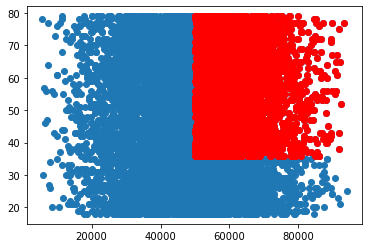

In [165]:
ig = plt.figure()
ax = plt.axes()
ax.scatter(df2.incomes, df2.ages)
ax.scatter(df2.incomes[(df2.incomes > 50000) & (df2.ages > 35)], df2.ages[(df2.incomes > 50000) & (df2.ages > 35)], c='red')

# Task 10: Calculate prior probabilities and try imporve prediction


In [166]:
dfToMLAfterScaling

,customer_id,ages,incomes,genders_Female,spending_scores_binned
0,1,0.622951,0.731379,1,0
1,2,0.836066,0.468958,1,1
2,3,0.459016,0.447030,0,8
3,4,0.229508,0.705661,0,6
4,5,0.688525,0.412951,0,1
...,...,...,...,...,...
9995,9996,0.327869,0.848146,1,0
9996,9997,0.081967,0.638361,0,4
9997,9998,0.000000,0.259320,0,0
9998,9999,0.049180,0.763739,0,0


In [167]:
prior_probabilities = dfToMLAfterScaling['spending_scores_binned'].value_counts(normalize=True)
print(prior_probabilities)

0     0.1951
1     0.1054
4     0.1027
7     0.1016
6     0.1006
3     0.0999
5     0.0991
8     0.0989
2     0.0962
10    0.0004
9     0.0001
Name: spending_scores_binned, dtype: float64


### Change of direction
Since we calculated the prior probabilities, it will not benefit us if I continue to work with decision trees (since this data will not have a big impact on this algorithm), so I will try a direction of algorithms that are affected by this, such as the naive Bayes

In [168]:
model = GaussianNB(priors=prior_probabilities.to_list())
test_ratio, rand_state = 0.2, 42
category_col_name = 'spending_scores_binned'
X_train, X_test, y_train, y_test = split_to_train_and_test(dfToMLAfterScaling, category_col_name, test_ratio, rand_state)
print(f'Shape of X_train is: {X_train.shape}, Shape of y_train is: {y_train.shape}')
model.fit(X_train, y_train)

Shape of X_train is: (8000, 4), Shape of y_train is: (8000,)


GaussianNB(priors=[0.1951, 0.1054, 0.1027, 0.1016, 0.1006, 0.0999, 0.0991,
                   0.0989, 0.0962, 0.0004, 0.0001])

In [169]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [170]:
print('Accuracy on Train data =', metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy on test  data =', metrics.accuracy_score(y_test, y_pred))
print("----------------------------------------------------------------------")
print('f1 score on Train data =', metrics.f1_score(y_train, y_pred_train, average='macro'))
print('f1 score on test data =', metrics.f1_score(y_test, y_pred, average='macro'))
print("----------------------------------------------------------------------")
print('precision score on Train data =', metrics.precision_score(y_train, y_pred_train, average='macro'))
print('precision score on test data =', metrics.precision_score(y_test, y_pred, average='macro'))
print("----------------------------------------------------------------------")
print('recall score on Train data =', metrics.recall_score(y_train, y_pred_train, average='macro'))
print('recall score on test data =', metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy on Train data = 0.194125
Accuracy on test  data = 0.1995
----------------------------------------------------------------------
f1 score on Train data = 0.12045383158355621
f1 score on test data = 0.033263859941642354
----------------------------------------------------------------------
precision score on Train data = 0.10854765936651173
precision score on test data = 0.019950000000000002
----------------------------------------------------------------------
recall score on Train data = 0.18181818181818182
recall score on test data = 0.1


In [184]:
try_df = dfToMLAfterScaling.drop("customer_id", axis=1)
try_df

,ages,incomes,genders_Female,spending_scores_binned
0,0.622951,0.731379,1,0
1,0.836066,0.468958,1,1
2,0.459016,0.447030,0,8
3,0.229508,0.705661,0,6
4,0.688525,0.412951,0,1
...,...,...,...,...
9995,0.327869,0.848146,1,0
9996,0.081967,0.638361,0,4
9997,0.000000,0.259320,0,0
9998,0.049180,0.763739,0,0


In [185]:
prior_probabilities = try_df['spending_scores_binned'].value_counts(normalize=True)
print(prior_probabilities)

0     0.1951
1     0.1054
4     0.1027
7     0.1016
6     0.1006
3     0.0999
5     0.0991
8     0.0989
2     0.0962
10    0.0004
9     0.0001
Name: spending_scores_binned, dtype: float64


In [186]:
model = GaussianNB(priors=prior_probabilities.to_list())
test_ratio, rand_state = 0.2, 42
category_col_name = 'spending_scores_binned'
X_train, X_test, y_train, y_test = split_to_train_and_test(try_df, category_col_name, test_ratio, rand_state)
print(f'Shape of X_train is: {X_train.shape}, Shape of y_train is: {y_train.shape}')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('Accuracy on Train data =', metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy on test  data =', metrics.accuracy_score(y_test, y_pred))
print("----------------------------------------------------------------------")
print('f1 score on Train data =', metrics.f1_score(y_train, y_pred_train, average='macro'))
print('f1 score on test data =', metrics.f1_score(y_test, y_pred, average='macro'))
print("----------------------------------------------------------------------")
print('precision score on Train data =', metrics.precision_score(y_train, y_pred_train, average='macro'))
print('precision score on test data =', metrics.precision_score(y_test, y_pred, average='macro'))
print("----------------------------------------------------------------------")
print('recall score on Train data =', metrics.recall_score(y_train, y_pred_train, average='macro'))
print('recall score on test data =', metrics.recall_score(y_test, y_pred, average='macro'))

Shape of X_train is: (8000, 3), Shape of y_train is: (8000,)
Accuracy on Train data = 0.194125
Accuracy on test  data = 0.1995
----------------------------------------------------------------------
f1 score on Train data = 0.12045383158355621
f1 score on test data = 0.033263859941642354
----------------------------------------------------------------------
precision score on Train data = 0.10854765936651173
precision score on test data = 0.019950000000000002
----------------------------------------------------------------------
recall score on Train data = 0.18181818181818182
recall score on test data = 0.1


### Inferences using prior probability
So far I have not been able to improve the various evaluation indicators.<br>
honestly I feel on one hand that I am missing something while on the other hand there are so few features and I can't think of a way to engineer them further so that we can get more information from them

# Task 11: encapsulate and add relevant unit-tests
So we are now going to implement 2 fundamental principle on different topics:

1. "encapsulation"(OOP fundamental principle) - an important feature in programming and especially in object-oriented programming that refers to the packaging of information with the operations that operate on that information as a single unit. Encapsulation allows the creation of a software unit with a defined interface to the rest of the software.

2. "Testing" (fundamental principle in software engineering) software testing is a process designed to evaluate the quality of software and its compliance with the requirements placed on it. Software testing is an integral part of software engineering and software quality assurance processes.<br>We will use unittest, a library that contains ASSERT commands, commands that allow us to write automatic tests that will run and report to us if a fault has occurred and save us the need to go through the code line by line and see that everything went as it should manually.

We can expand a lot more on these 2 important principles, but time is short, so let's get to work

In [190]:
dfToML

,customer_id,ages,incomes,genders_Female,spending_scores_binned
0,1,56,70277.0,1,0
1,2,69,47084.0,1,1
2,3,46,45146.0,0,8
3,4,32,68004.0,0,6
4,5,60,42134.0,0,1
...,...,...,...,...,...
9995,9996,38,80597.0,1,0
9996,9997,23,62056.0,0,4
9997,9998,18,28556.0,0,0
9998,9999,21,73137.0,0,0


In [224]:
class store_customers_data_science_class:
    def split_to_train_and_test(self, dataset, label_column, test_ratio, rand_state):
        col=dataset.columns.drop(label_column)
        X=dataset[col]
        y=dataset[label_column]
        XTrain,XTest,yTrain,yTest=train_test_split(X, y, random_state=rand_state, test_size=test_ratio)
        print(f'Shape of X_train is: {XTrain.shape}, Shape of y_train is: {yTrain.shape}')
        return XTrain, XTest, yTrain, yTest
    
    def Fit_GaussianNB_And_Get_Model(self, X_train, y_train, prior_probabilities=None):
        if(prior_probabilities != None):
            gnb = GaussianNB(priors=prior_probabilities.to_list())
        else:
            gnb = GaussianNB()

        gnb.fit(X_train, y_train)

        return gnb
    
    def fit_and_print_knn(clf, X_train, y_train, X_Test, y_Test):
        clf.fit(X_train, y_train)
        best_knn = clf.best_estimator_
        y_pred = best_knn.predict(X_test)
        y_pred_train = best_knn.predict(X_train)
        print('Best K:', best_knn.n_neighbors)
        print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred)
        cross_val_accuracy_f1_score(best_knn, X_Test, y_Test)

    def traning_KNN_clf_f1_accuracy(X_train, y_train, X_Test, y_Test, parameters):
        knn = KNeighborsClassifier()
        clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True, average='macro'))
        print('------------The parameter is chosen by *f1* score test------------')
        fit_and_print_knn(clf, X_train, y_train, X_Test, y_Test)
        print('------------The parameter is chosen by *accuracy* score test------------')
        clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
        fit_and_print_knn(clf, X_train, y_train, X_Test, y_Test)

    def find_best_k_for_KNN(self, X_train, y_train, X_Test, y_Test, num_of_rows_in_real_table):
        max_k = int(math.sqrt(num_of_rows_in_real_table))
        parameters = {'n_neighbors':range(3, max_k, 2) }
        traning_KNN_clf_f1_accuracy(X_train, y_train, X_Test, y_Test, parameters) 
    

    def fit_and_print_dt(clf, X_train, y_train, X_test, y_test):
        clf.fit(X_train, y_train)
        best_dt = clf.best_estimator_
        y_pred = best_dt.predict(X_test)
        y_pred_train = best_dt.predict(X_train)
        print('Best parameters:', clf.best_params_)
        print('Best score:', clf.best_score_)
        print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred)
        cross_val_accuracy_f1_score(best_dt, X_test, y_test)

    def find_best_decision_tree_params(self, X_train, X_test, y_train, y_test, number_of_rows):
        max_min_samples = int(number_of_rows * 8 / 100) #8% of intenses
        parameters = {'max_depth':range(2, 10),"min_samples_split":range(5, max_min_samples,int(max_min_samples / 10))}
        dt = tree.DecisionTreeClassifier()

        print('------------The parameter is chosen by *f1* score test------------')
        clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True, average='macro'))
        fit_and_print_dt(clf, X_train, y_train, X_test, y_test)
        print('------------The parameter is chosen by *accuracy* score test------------')
        clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
        fit_and_print_dt(clf, X_train, y_train, X_test, y_test)

        return clf.best_params_['max_depth'], clf.best_params_['min_samples_split']

    def Create_Decision_Tree_And_Get_The_Model_f1(self, max_depth, min_samples_split):
        dt = tree.DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        clf = GridSearchCV(dt, {},
                           scoring=make_scorer(metrics.f1_score, greater_is_better=True, average='macro'))
        clf.fit(X_train, y_train)

        return clf
    
    
    def fit_and_print_rf(clf, X_train, y_train, X_test, y_test):
        clf.fit(X_train, y_train)
        best_rf = clf.best_estimator_
        y_pred = best_rf.predict(X_test)
        y_pred_train = best_rf.predict(X_train)
        print('Best parameters:', clf.best_params_['n_estimators'])
        print('Best score:', clf.best_score_)
        print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred)
        cross_val_accuracy_f1_score(best_rf, X_test, y_test)

    def find_best_random_forest_num_estimators(X_train, y_train, X_test, y_test):
        parameters = {'n_estimators':[11,51,71] }
        rf = RandomForestClassifier()
        print('------------The parameter is chosen by *f1* score test------------')
        clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True, average='macro'))
        fit_and_print_rf(clf, X_train, y_train, X_test, y_test)
        print('------------The parameter is chosen by *accuracy* score test------------')
        clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
        fit_and_print_dt(clf, X_train, y_train, X_test, y_test)
    
    
    def print_Accuracy_f1_results(y_train, y_test, y_pred_train, y_pred):
        print('Accuracy on Train data =', metrics.accuracy_score(y_train, y_pred_train))
        print('Accuracy on test  data =', metrics.accuracy_score(y_test, y_pred))
        print('f1 score on Train data =', metrics.f1_score(y_train, y_pred_train, average='macro'))
        print('f1 score on test data =', metrics.f1_score(y_test, y_pred, average='macro'))

    def cross_val_accuracy_f1_score(model, X_test, y_test, cv = 10):
        eva_Accuracy = cross_val_score(model, X_test, y_test, cv = cv, scoring=make_scorer(metrics.accuracy_score,
                                                                                             greater_is_better=True))
        print(f'eva of Accuracy is: {eva_Accuracy}')
        eva_f1 = cross_val_score(model, X_test, y_test, cv = cv, scoring=make_scorer(metrics.f1_score,
                                                                            greater_is_better=True, average='macro'))
        print(f'eva of f1 is: {eva_f1}')
    
    def Accuracy_evaluation(self, y_train, y_pred_train, y_test, y_pred_test):
        acuur_train = metrics.accuracy_score(y_train, y_pred_train)
        acuur_test = metrics.accuracy_score(y_test, y_pred_test)
        
        print('Accuracy on Train data =', acuur_train)
        print('Accuracy on test  data =', acuur_test)
        
        return acuur_train, acuur_test
        
    def F1_evaluation(self, y_train, y_pred_train, y_test, y_pred_test, average='binary'):
        f1_train = metrics.f1_score(y_train, y_pred_train, average=average)
        f1_test = metrics.f1_score(y_test, y_pred_test, average=average)
        
        print('f1 score on Train data =', f1_train)
        print('f1 score on test data =', f1_test)
        
        return f1_train, f1_test
    
    def Precision_evaluation(self, y_train, y_pred_train, y_test, y_pred_test, average='binary'):
        precision_train = metrics.precision_score(y_train, y_pred_train, average=average)
        precision_test = metrics.precision_score(y_test, y_pred_test, average=average)
        
        print('precision score on Train data =', precision_train)
        print('precision score on test data =', precision_test)
        
        return precision_train, precision_test
    
    def Recall_evaluation(self, y_train, y_pred_train, y_test, y_pred_test, average='binary'):
        Recall_train = metrics.recall_score(y_train, y_pred_train, average=average)
        Recall_test = metrics.recall_score(y_test, y_pred_test, average=average)
        
        print('recall score on Train data =', Recall_train)
        print('recall score on test data =', Recall_test)
        
        return Recall_train, Recall_test

    def R2_evaluation(self, y_train, y_pred_train, y_test, y_pred_test):
        R2_train = metrics.r2_score(y_train, y_pred_train)
        R2_test = metrics.r2_score(y_test, y_pred_test)
        
        print('R2 score on Train data =', R2_train)
        print('R2 score on test data =', R2_test)
        
        return R2_train, R2_test

    def classification_model_evaluation(self, y_train, y_pred_train, y_test, y_pred_test, average='binary'):
        
        save_scores = []
        train_accuracy, test_accur = self.Recall_evaluation(y_train, y_pred_train, y_test, y_pred_test, average=average)
        save_scores.append((train_accuracy, test_accur))

        train_accuracy, test_accur = self.F1_evaluation(y_train, y_pred_train, y_test, y_pred_test, average=average)
        save_scores.append((train_accuracy, test_accur))
        
        train_accuracy, test_accur = self.Accuracy_evaluation(y_train, y_pred_train, y_test, y_pred_test)
        save_scores.append((train_accuracy, test_accur))

        train_accuracy, test_accur = self.Precision_evaluation(y_train, y_pred_train, y_test, y_pred_test, average=average)
        save_scores.append((train_accuracy, test_accur))
        
        return save_scores

In [225]:
#from storeCustomersModel import store_customers_data_science_class #if we want add it from outside.
import unittest

class TestCustomerModeling(unittest.TestCase):
    
    def test_split_to_train_and_test_Supervised(self, df, col_target, test_ratio, rand_state):
        modeling = store_customers_data_science_class()
        
        X_train, X_test, y_train, y_test = modeling.split_to_train_and_test(
                                            df, col_target, test_ratio, rand_state)

        self.assertEqual(X_train.shape, (df.shape[0] * (1 - test_ratio), df.shape[1] - 1))
        self.assertEqual(X_test.shape, (df.shape[0] * test_ratio, df.shape[1] - 1))
        self.assertEqual(y_train.shape, (df.shape[0] * (1 - test_ratio),))
        self.assertEqual(y_test.shape, (df.shape[0] * test_ratio,))
        
        return X_train, X_test, y_train, y_test
        
    def test_Fit_GaussianNB_And_Get_Model(self, X_train, X_test, y_train):
        modeling = store_customers_data_science_class()
        
        gnb = modeling.Fit_GaussianNB_And_Get_Model(X_train, y_train)
        y_pred = gnb.predict(X_test)
        y_pred_train = gnb.predict(X_train)
        
        self.assertIsInstance(gnb, sklearn.naive_bayes.GaussianNB)
        
        accuracy_train = accuracy_score(y_train, y_pred_train)
        
        result = 0.10
        for i in range(1, 100):
            self.assertGreater(accuracy_train, result)
            result += 0.10
    
    def test_find_best_decision_tree_params(self, X_train, X_test, y_train, y_test, number_of_rows):
        modeling = store_customers_data_science_class()
        
        max_dep, min_sam = modeling.find_best_decision_tree_params(X_train, X_test, y_train, y_test, number_of_rows)
        dt = tree.DecisionTreeClassifier(max_depth=max_dep,min_samples_split=min_sam)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict(X_test)
        y_pred_train = dt.predict(X_train)
        
        accuracy_train = accuracy_score(y_train, y_pred_train)
        
        result = 0.10
        for i in range(1, 100):
            self.assertGreater(accuracy_train, result)
            result += 0.10
            
    def test_Create_Decision_Tree_And_Get_The_Model_f1(self, X_train, X_test, y_train, max_depth, min_samples_split):
        modeling = store_customers_data_science_class()
        
        clf = modeling.Create_Decision_Tree_And_Get_The_Model_f1(max_depth, min_samples_split)
        y_pred = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        
        self.assertIsInstance(clf, sklearn.model_selection._search.GridSearchCV)

        accuracy_train = accuracy_score(y_train, y_pred_train)
        
        result = 0.10
        for i in range(1, 100):
            self.assertGreater(accuracy_train, result)
            result += 0.10
    
    def test_Accuracy_evaluation(self, ML_modle, X_train, X_test, y_train, y_test):
        modeling = store_customers_data_science_class()
        y_pred_test = ML_modle.predict(X_test)
        y_pred_train  = ML_modle.predict(X_train)
        acuur_train, acuur_test = modeling.Accuracy_evaluation(y_train, y_pred_train, 
                                                               y_test, y_pred_test)
        self.assertFalse(np.isnan(acuur_train))
        self.assertTrue(0 < acuur_train < 1)
        
        self.assertFalse(np.isnan(acuur_test))
        self.assertTrue(0 < acuur_test < 1)
    
    def test_F1_evaluation(self, ML_modle, X_train, X_test, y_train, y_test, average='binary'):
        modeling = store_customers_data_science_class()
        y_pred_test = ML_modle.predict(X_test)
        y_pred_train  = ML_modle.predict(X_train)
        
        F1_train, F1_test = modeling.F1_evaluation(y_train, y_pred_train, 
                                                               y_test, y_pred_test, average=average)
        self.assertFalse(np.isnan(F1_train))
        self.assertTrue(0 < F1_train < 1)

        self.assertFalse(np.isnan(F1_test))
        self.assertTrue(0 < F1_test < 1)
    
    def test_Precision_evaluation(self, ML_modle, X_train, X_test, y_train, y_test, average='binary'):
        modeling = store_customers_data_science_class()
        y_pred_test = ML_modle.predict(X_test)
        y_pred_train  = ML_modle.predict(X_train)
        
        Precision_train, Precision_test = modeling.Precision_evaluation(y_train, y_pred_train, 
                                                               y_test, y_pred_test, average=average)
        self.assertFalse(np.isnan(Precision_train))
        self.assertTrue(0 < Precision_train < 1)

        self.assertFalse(np.isnan(Precision_test))
        self.assertTrue(0 < Precision_test < 1)
        
    def test_Recall_evaluation(self, ML_modle, X_train, X_test, y_train, y_test, average='binary'):
        modeling = store_customers_data_science_class()
        y_pred_test = ML_modle.predict(X_test)
        y_pred_train  = ML_modle.predict(X_train)
        
        Recall_train, Recall_test = modeling.Recall_evaluation(y_train, y_pred_train, 
                                                               y_test, y_pred_test, average=average)
        self.assertFalse(np.isnan(Recall_train))
        self.assertTrue(0 < Recall_train < 1)

        self.assertFalse(np.isnan(Recall_test))
        self.assertTrue(0 < Recall_test < 1)
        
    def test_R2_evaluation(self, ML_modle, X_train, X_test, y_train, y_test):
        
        modeling = store_customers_data_science_class()
        y_pred_test = ML_modle.predict(X_test)
        y_pred_train  = ML_modle.predict(X_train)
        
        r2_train, r2_test = modeling.r2_evaluation(y_train, y_pred_train, 
                                                               y_test, y_pred_test)
        
        self.assertFalse(np.isnan(r2_train))
        self.assertTrue(-1 < r2_train < 1)

        self.assertFalse(np.isnan(r2_test))
        self.assertTrue(-1 < r2_test < 1)
        
    def test_classification_model_evaluation(self, ML_modle, X_train, X_test, y_train, y_test, average='binary'):
        modeling = store_customers_data_science_class()
        y_pred_test = ML_modle.predict(X_test)
        y_pred_train  = ML_modle.predict(X_train)
        
        score_saver = modeling.classification_model_evaluation(y_train, y_pred_train, 
                                                               y_test, y_pred_test, average=average)
        for tuple_ in score_saver:
            for num in tuple_:
                self.assertFalse(np.isnan(num))
                self.assertTrue(0 < num < 1)

In [226]:
TC = TestCustomerModeling()
X_train, X_test, y_train, y_test = TC.test_split_to_train_and_test_Supervised(
                                                        dfToML, 'spending_scores_binned',
                                                                test_ratio, rand_state)

Shape of X_train is: (8000, 4), Shape of y_train is: (8000,)


In [227]:
TC.test_Create_Decision_Tree_And_Get_The_Model_f1(X_train, X_test, y_train, 3, 85)

AssertionError: 0.195875 not greater than 0.2

In [228]:
TC.test_find_best_decision_tree_params(X_train, X_test, y_train, y_test, dfToML.shape[0])

------------The parameter is chosen by *f1* score test------------
Best parameters: {'max_depth': 9, 'min_samples_split': 5}
Best score: 0.05933180220967547
Accuracy on Train data = 0.21775
Accuracy on test  data = 0.1925
f1 score on Train data = 0.0825432721474813
f1 score on test data = 0.04595049033180627
eva of Accuracy is: [0.11  0.14  0.17  0.13  0.16  0.17  0.125 0.155 0.175 0.18 ]
eva of f1 is: [0.06920912 0.0878589  0.04249837 0.05952343 0.05377301 0.11983415
 0.06563582 0.07101053 0.04306924 0.07107972]
------------The parameter is chosen by *accuracy* score test------------
Best parameters: {'max_depth': 2, 'min_samples_split': 485}
Best score: 0.194
Accuracy on Train data = 0.194
Accuracy on test  data = 0.1995
f1 score on Train data = 0.029541647632099897
f1 score on test data = 0.033263859941642354
eva of Accuracy is: [0.195 0.195 0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2  ]
eva of f1 is: [0.0362622  0.03703704 0.03703704 0.03703704 0.037192   0.03703704
 0.03703704 0

AssertionError: 0.194 not greater than 0.2

In [229]:
TC.test_Fit_GaussianNB_And_Get_Model(X_train, X_test, y_train)

AssertionError: 0.194125 not greater than 0.2

In [230]:
modeling = store_customers_data_science_class()
gnb = modeling.Fit_GaussianNB_And_Get_Model(X_train, y_train)
TC.test_Accuracy_evaluation(gnb , X_train, X_test, y_train, y_test)

Accuracy on Train data = 0.194125
Accuracy on test  data = 0.1995


In [231]:
modeling = store_customers_data_science_class()
gnb = modeling.Fit_GaussianNB_And_Get_Model(X_train, y_train)
average = 'macro'
TC.test_Recall_evaluation(gnb, X_train, X_test, y_train, y_test, average=average)

recall score on Train data = 0.18181818181818182
recall score on test data = 0.1


In [232]:
modeling = store_customers_data_science_class()
gnb = modeling.Fit_GaussianNB_And_Get_Model(X_train, y_train)
average = 'macro'
TC.test_Precision_evaluation(gnb, X_train, X_test, y_train, y_test, average=average)

precision score on Train data = 0.10854765936651173
precision score on test data = 0.019950000000000002


In [233]:
modeling = store_customers_data_science_class()
gnb = modeling.Fit_GaussianNB_And_Get_Model(X_train, y_train)
average = 'macro'
TC.test_classification_model_evaluation(gnb, X_train, X_test, y_train, y_test, average=average)

recall score on Train data = 0.18181818181818182
recall score on test data = 0.1
f1 score on Train data = 0.12045383158355621
f1 score on test data = 0.033263859941642354
Accuracy on Train data = 0.194125
Accuracy on test  data = 0.1995
precision score on Train data = 0.10854765936651173
precision score on test data = 0.019950000000000002


In [234]:
modeling = store_customers_data_science_class()
gnb = modeling.Fit_GaussianNB_And_Get_Model(X_train, y_train)
average = 'macro'
TC.test_F1_evaluation(gnb, X_train, X_test, y_train, y_test, average=average)

f1 score on Train data = 0.12045383158355621
f1 score on test data = 0.033263859941642354


In [372]:
#for Regression problems
TC = TestCustomerModeling()
X_train, X_test, y_train, y_test = TC.test_split_to_train_and_test_Supervised(
                                                        dfToML, 'incomes',
                                                                test_ratio, rand_state)
modeling = store_customers_data_science_class()

gnb = modeling.Fit_GaussianNB_And_Get_Model(X_train, y_train)
linear_regression_model = LinearRegression()  
clp = linear_regression_model.fit(X_train, y_train)  
average = 'macro'
TC.test_F1_evaluation(clp, X_train, X_test, y_train, y_test)

# Led bonus question:
Final Bonus:
The csv file “light_sig_with_noise” contains the light readings of one LED in our device. However, the photodiode that counts the photons adds noise of different types to the resulting signal: fluctuations, recurring noise frequencies, and a decline in the intensity. These types of noise have a destabilizing effect on the results, and we frequently search for them and correct them.
We ask you to clean and remove the noise you come across in any method that seems suitable. Please visualize the methods you chose and the clean signal.

## My solution:


In [235]:
from scipy.signal import savgol_filter, butter, lfilter, cheby1, filtfilt

In [236]:
df = pd.read_csv('light_sig_with_noise.csv', index_col=0)
df

,0
0,6307.751282
1,6355.806260
2,6328.861237
3,6343.916213
4,6299.971187
...,...
26595,5530.932468
26596,5536.897132
26597,5533.861892
26598,5548.826749


In [238]:
df2 = df.rename(columns={"0": "light_sig"})#we will work on the copy.
df2

,light_sig
0,6307.751282
1,6355.806260
2,6328.861237
3,6343.916213
4,6299.971187
...,...
26595,5530.932468
26596,5536.897132
26597,5533.861892
26598,5548.826749


In [239]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26600 entries, 0 to 26599
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   light_sig  26600 non-null  float64
dtypes: float64(1)
memory usage: 415.6 KB


In [240]:
df2.describe()

,light_sig
count,26600.000000
mean,5879.538654
std,225.598862
min,5501.906683
25%,5685.276079
50%,5842.327432
75%,6048.113335
max,7102.917148


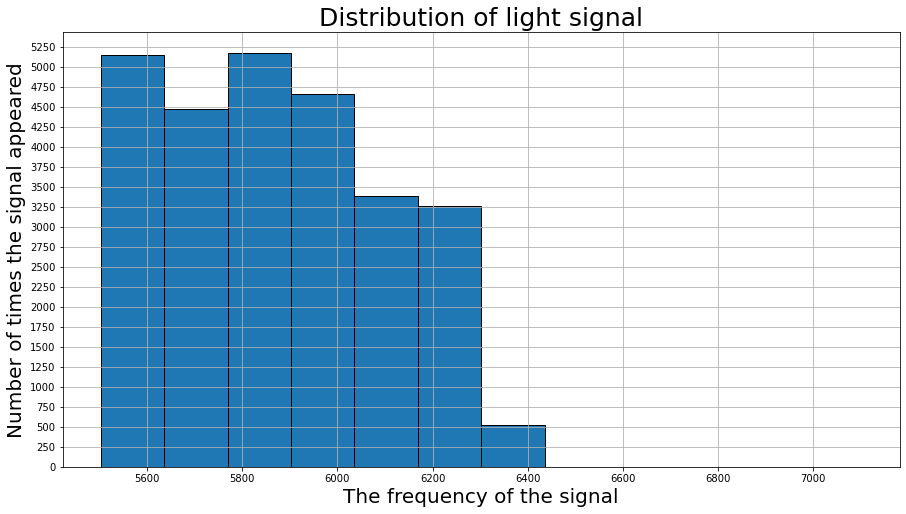

In [241]:
titlefont = 25
subtitlefont = 20
figsize=(15, 8)

plt.figure(figsize=figsize)
plt.hist(df2['light_sig'], bins=12, edgecolor='black')
plt.title('Distribution of light signal', fontsize=titlefont)
plt.xlabel('The frequency of the signal', fontsize=subtitlefont)
plt.ylabel('Number of times the signal appeared', fontsize=subtitlefont)
plt.yticks(range(0, 5251, 250))
plt.grid(True)
plt.show()

## Outlieres - graph analysis - hist
From the histogram we can see that there is a tail of abnormal values after frequency 6500 approximately but at this stage we are looking for more abnormal data because in the description of the problem we know that "the photodiode that counts the photons adds noise of different types to the resulting signal: fluctuations, recurring noise frequencies , and a decline in the intensity" and here it is difficult to say exactly where the sharp increases and decreases are that we expect to see, so we will try to present the data in another graph.

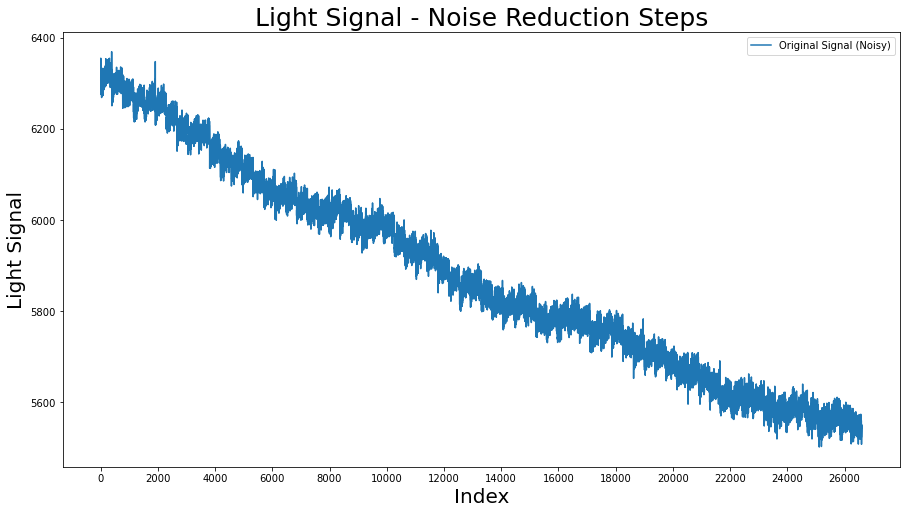

In [259]:
light_signal = df2["light_sig"]
plt.figure(figsize=figsize)
plt.plot(light_signal, label='Original Signal (Noisy)')
plt.title('Light Signal - Noise Reduction Steps', fontsize=titlefont)
plt.xlabel('Index', fontsize=subtitlefont)
plt.xticks(range(0, 26600, 2000))
plt.ylabel('Light Signal', fontsize=subtitlefont)
plt.legend()
plt.show()

Text(0, 0.5, 'Density')

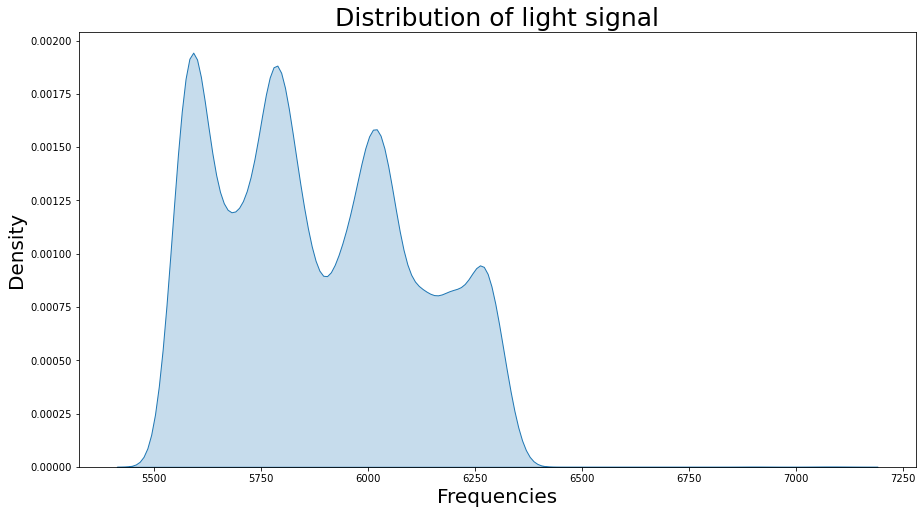

In [242]:
plt.figure(figsize=figsize)
sns.kdeplot(df2.light_sig, shade=True)
plt.title('Distribution of light signal', fontsize=titlefont)
plt.xlabel('Frequencies', fontsize=subtitlefont)
plt.ylabel('Density', fontsize=subtitlefont)

### Outlieres - graph analysis - kdeplot
From the graph it is easy for us to see that we have a long tail from the frequency 6350 - 6400 and above.

But this time compared to the previous graph we also clearly see the sharp rises and falls we were looking for.

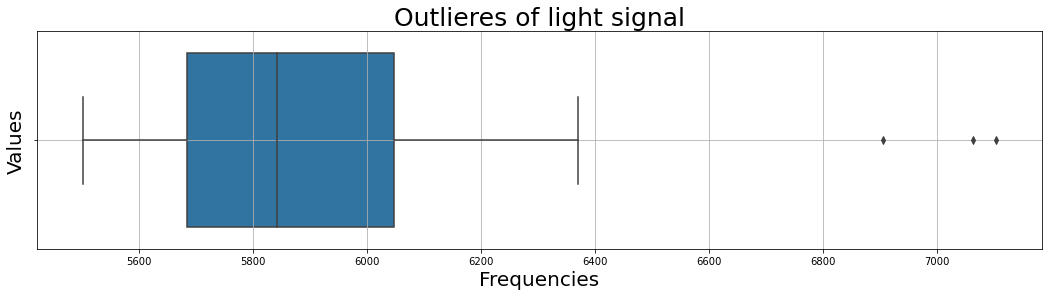

In [243]:
figsize = (18, 4)
plt.figure(figsize=figsize)

sns.boxplot(df2.light_sig)#1.5iqr
plt.title("Outlieres of light signal", fontsize=titlefont)
plt.xlabel("Frequencies", fontsize=subtitlefont)
plt.ylabel("Values", fontsize=subtitlefont)
plt.grid(True)

### Outlieres - graph analysis - boxplot
Here we can clearly see the outliers (according to the 1.5IQR).

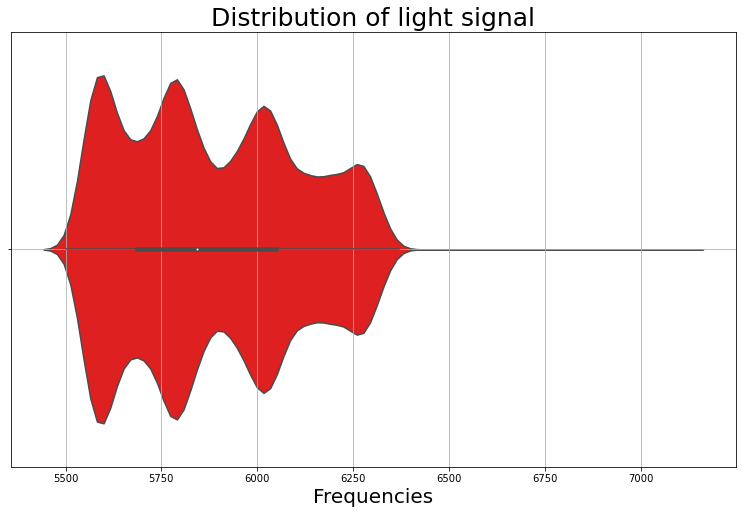

In [244]:
figsize = (13, 8)
plt.figure(figsize=figsize)
plt.title('Distribution of light signal', fontsize=titlefont)
sns.violinplot(df2.light_sig, color='red', inner_kws=dict(whis_width=10))
plt.xlabel('Frequencies', fontsize=subtitlefont)
plt.grid(True)

### Outlieres - graph analysis - violinplot
Here we can clearly see the outliers (according to the 1.5IQR) and in addition the extreme increases and decreases in values.

so now lets start handle the outlieres:

In [246]:
def Clearing_Outliers_By_IQR(df, colName):#took the function we already wrote in our the project
    Q1 = np.percentile(df[colName], 25)
    Q3 = np.percentile(df[colName], 75)
    IQR = Q3 - Q1
    
    df[colName][(df[colName] < Q1 - 1.5 * IQR) | (df[colName] > Q3 + 1.5 * IQR)] = np.nan
    print(f'now have {df[colName].isna().sum()} nans')
    df.dropna(inplace=True)# we change it to drop.
    print(f'now have {df[colName].isna().sum()} nans and no outliers')
    
Clearing_Outliers_By_IQR(df2, 'light_sig')

now have 3 nans
now have 0 nans and no outliers


In [247]:
df2.describe()

,light_sig
count,26597.000000
mean,5879.409634
std,225.282400
min,5501.906683
25%,5685.207189
50%,5842.319776
75%,6048.071967
max,6370.142355


# Conclusions from the data analysis:
So after analyzing the data it turns out that the nature of the problem is exactly as I observed before:<br> when we looked for OUTLIERS we found only 3 exceptions, while in certain types of graphs we discovered that inside the data there are abnormal jumps and drops of data that the traditional methods of handling OUTLIERS do not solve.

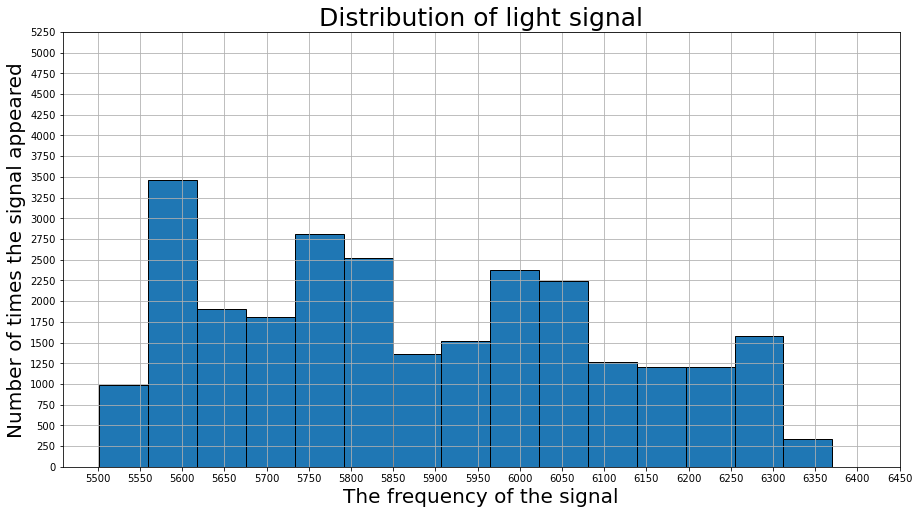

In [248]:
titlefont = 25
subtitlefont = 20
figsize=(15, 8)

plt.figure(figsize=figsize)
plt.hist(df2['light_sig'], bins=15, edgecolor='black')
plt.title('Distribution of light signal', fontsize=titlefont)
plt.xlabel('The frequency of the signal', fontsize=subtitlefont)
plt.ylabel('Number of times the signal appeared', fontsize=subtitlefont)
plt.yticks(range(0, 5251, 250))
plt.xticks(range(5500, 6500, 50))
plt.grid(True)
plt.show()

## Possible solutions:
1. So the first (naive) option is to look at the graph to understand where the high jumps happen and manually filter the dimensions according to the data (example according to the graph above: we will fix the curve between the values 5550 - 5750 and then move on to deal with the next extreme curve after it).

2. After a short research on the subject, I found that there are several well-known methods for handling such cases (just like design patterns, it is very important to always check - in the absolute majority of times other people have already encountered the problem I am trying to solve before me and solved it, so it is always important to do such research {in short, it is useful in saving time, in preventing bugs, in accepting implementation of code at a high engineering level and more..}) And these methods are:<br>
- Smoothing, Filtering, Baseline Estimation, Fertile conversion, etc..

### The most relevant solutions for us are (according to my understanding):
<b>Low-pass Filter</b> - benefits:smoothing the signal: by removing high-frequency fluctuations, a low-pass filter can smooth out the overall signal, making it easier to identify trends and patterns. <b>This can be particularly beneficial for removing noise caused by factors like sensor instability</b>(this is exactly our problem), power supply variations, or environmental factors.Preserving the underlying signal: Ideally, a well-chosen cutoff frequency allows the low-pass filter <b>to remove noise while preserving the essential features of the original light signal</b>(we will both filter out the noise and preserve as much as possible the original values of our signals).

### Possible methods:
There are hardware and digital filtering methods, we will of course focus on digital. the relvant methods are:<br>
- Butterworth, Chebyshev, Savitzky-Golay (S-G), etc..<br>
Each of them has different advantages and disadvantages that are reflected in several aspects(filtering approach, frequency response, signal preservation), we will not elaborate here.

### The most relevant method for us is (according to my understanding):
<b>A combination</b> of filtering techniques might be most effective in removing different types of noise affecting our light signal data.

* Ill start with <b>Savitzky-Golay (S-G) Filter</b>: This filter is a good starting point for addressing fluctuations and smoothing the overall signal. It can effectively reduce high-frequency noise without significantly affecting the underlying trend or sharp features of the light signal.

* Then I will use a <b>Low-pass filter(Butterworth)</b>: This filter could be useful for removing high-frequency noise, which might correspond to the recurring noise frequencies in your data. It has a flat frequency response in the passband, which means it won’t introduce ripple into the signal.

In [249]:
df3 = df2.copy()
df3

,light_sig
0,6307.751282
1,6355.806260
2,6328.861237
3,6343.916213
4,6299.971187
...,...
26595,5530.932468
26596,5536.897132
26597,5533.861892
26598,5548.826749


Text(0, 0.5, 'Density')

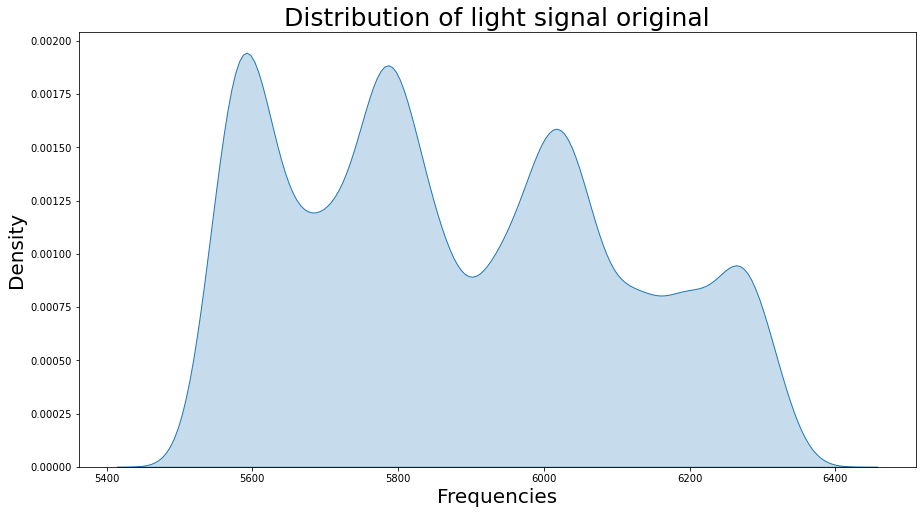

In [250]:
plt.figure(figsize=figsize)
sns.kdeplot(df3.light_sig, shade=True)
plt.title('Distribution of light signal original', fontsize=titlefont)
plt.xlabel('Frequencies', fontsize=subtitlefont)
plt.ylabel('Density', fontsize=subtitlefont)

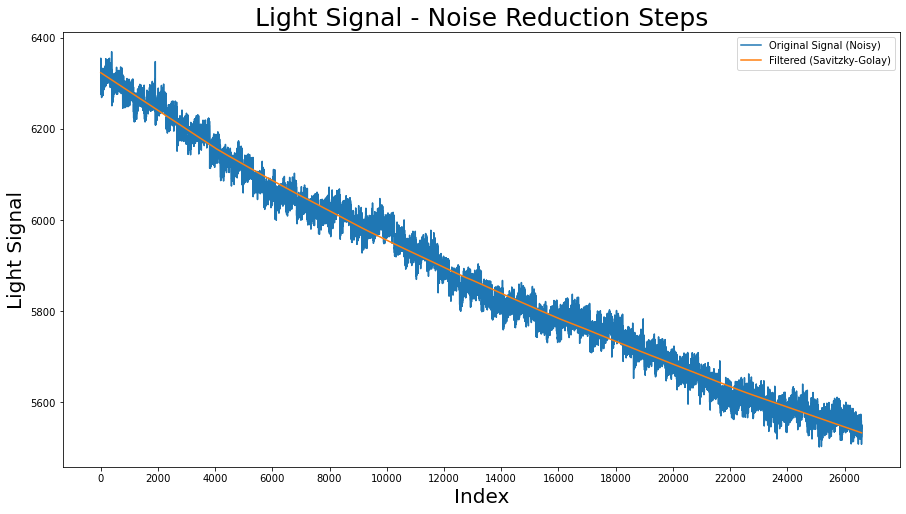

In [253]:
df3 = df2.copy()
light_signal = df3["light_sig"]

#I made several attempts here in order to see how the parameters affect the result until I reached these results
window_size = 8001  
poly_degree = 1  

#Savitzky-Golay filter
smoothed_signal = savgol_filter(light_signal, window_length=window_size, polyorder=poly_degree)

cutoff_freq = 3000#5600
sampling_rate = 6100  
order = 3

# Apply low-pass filter(Butterworth)
if cutoff_freq > 0:
    def butter_lowpass(cutoff_freq, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff_freq / nyq
        b, a = butter(order, normal_cutoff, btype='low')
        return b, a

    b, a = butter_lowpass(cutoff_freq, sampling_rate, order)
    filtered_signal = lfilter(b, a, smoothed_signal)
else:
    filtered_signal = smoothed_signal

#Apply low-pass filter(Chebyshev)
"""
def cheby_lowpass(cutoff, fs, ripple_db, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = cheby1(order, ripple_db, normal_cutoff, btype='low', analog=False)
    return b, a

def cheby_lowpass_filter(data, cutoff, fs, ripple_db, order=5):
    b, a = cheby_lowpass(cutoff, fs, ripple_db, order=order)
    y = filtfilt(b, a, data)
    return y

order = 6#6
fs = 10.0#10.0      
cutoff = 3.667#3.667 
ripple_db = 5#5.0 

filtered_signal = cheby_lowpass_filter(smoothed_signal, cutoff, fs, ripple_db, order)
"""

plt.figure(figsize=figsize)
plt.plot(light_signal, label='Original Signal (Noisy)')
plt.plot(smoothed_signal, label='Filtered (Savitzky-Golay)')
plt.title('Light Signal - Noise Reduction Steps', fontsize=titlefont)
plt.xlabel('Index', fontsize=subtitlefont)
plt.xticks(range(0, 26600, 2000))
plt.ylabel('Light Signal', fontsize=subtitlefont)
plt.legend()
plt.show()

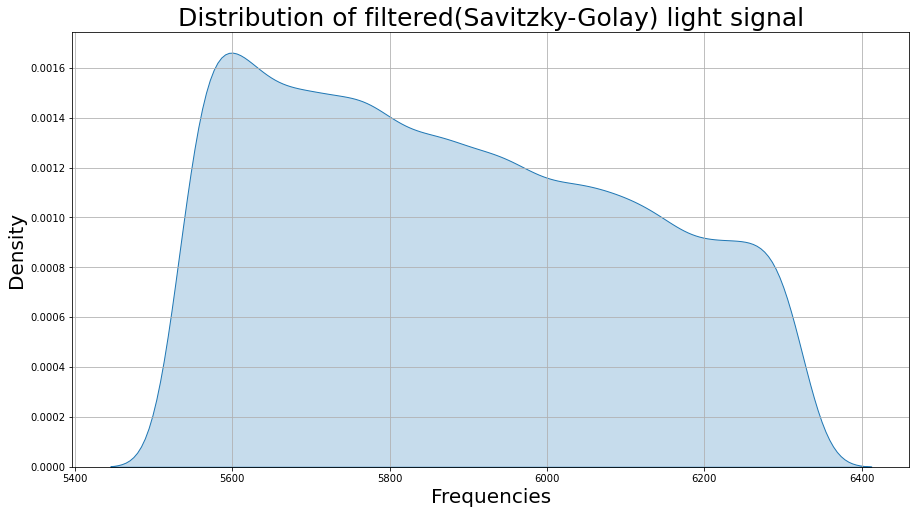

In [254]:
df3.drop('light_sig', axis=1, inplace=True)
df3['light_sig'] = smoothed_signal
plt.figure(figsize=figsize)
sns.kdeplot(df3.light_sig, shade=True)
plt.title('Distribution of filtered(Savitzky-Golay) light signal', fontsize=titlefont)
plt.xlabel('Frequencies', fontsize=subtitlefont)
plt.ylabel('Density', fontsize=subtitlefont)
plt.grid(True)

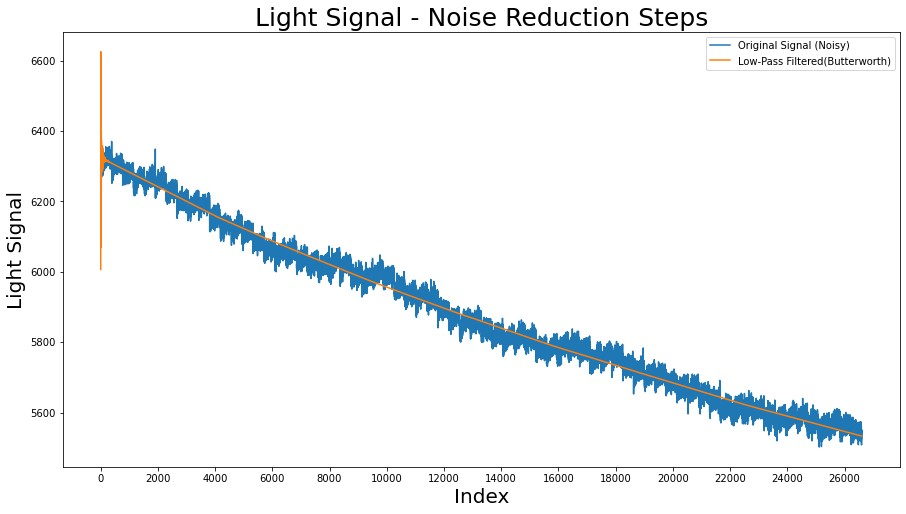

In [255]:
plt.figure(figsize=figsize)
plt.plot(light_signal, label='Original Signal (Noisy)')
if (cutoff_freq > 0) or (cutoff > 0):
    plt.plot(filtered_signal, label='Low-Pass Filtered(Butterworth)')
plt.title('Light Signal - Noise Reduction Steps', fontsize=titlefont)
plt.xlabel('Index', fontsize=subtitlefont)
plt.xticks(range(0, 26600, 2000))
plt.ylabel('Light Signal', fontsize=subtitlefont)
plt.legend()
plt.show()

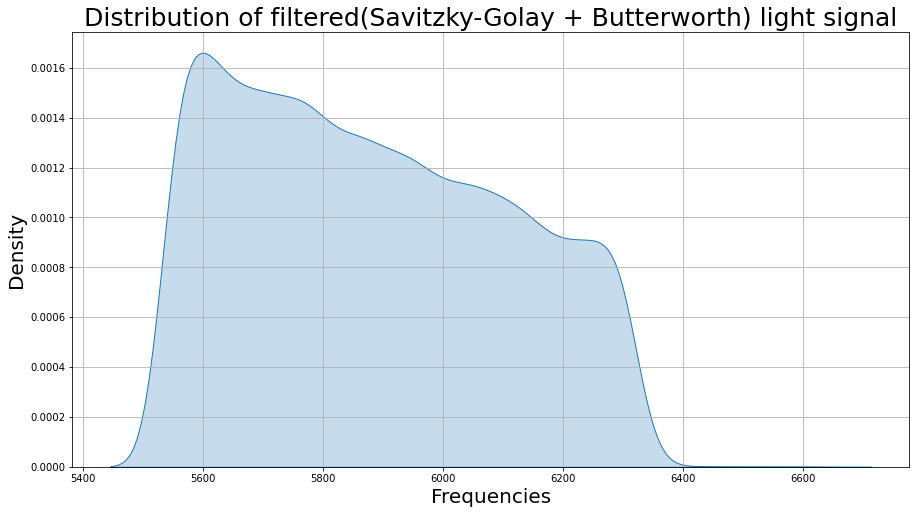

In [256]:
df3.drop('light_sig', axis=1, inplace=True)
df3['light_sig'] = filtered_signal
plt.figure(figsize=figsize)
sns.kdeplot(df3.light_sig, shade=True)
plt.title('Distribution of filtered(Savitzky-Golay + Butterworth) light signal', fontsize=titlefont)
plt.xlabel('Frequencies', fontsize=subtitlefont)
plt.ylabel('Density', fontsize=subtitlefont)
plt.grid(True)

# Summary of results:
Here we performed a combination of two filters on the data, the first was:<br>
Savitzky-Golay: whose results you can clearly see how it flattens out the abnormal jumps and drops and makes the data more "smooth" while preserving as much as possible the original values.

Then on the filtered information we activated another filter and it is:
Butterworth - whose results are less clearly visible in the graph except for the right tail of the values which is somewhat similar to our original graph before removing the outliers.

Important points to note:<br>
1. During the work I also tried to see a combination of Savitzky-Golay combination and then Chebyshev filtering but even there the results ranged between a very low effect on the graph if any and an excessive effect.

2. I should mention that I tried many combinations of parameters according to different indices and this is the best result I have seen of all the combinations.


So this seems to be the best result for our problem:

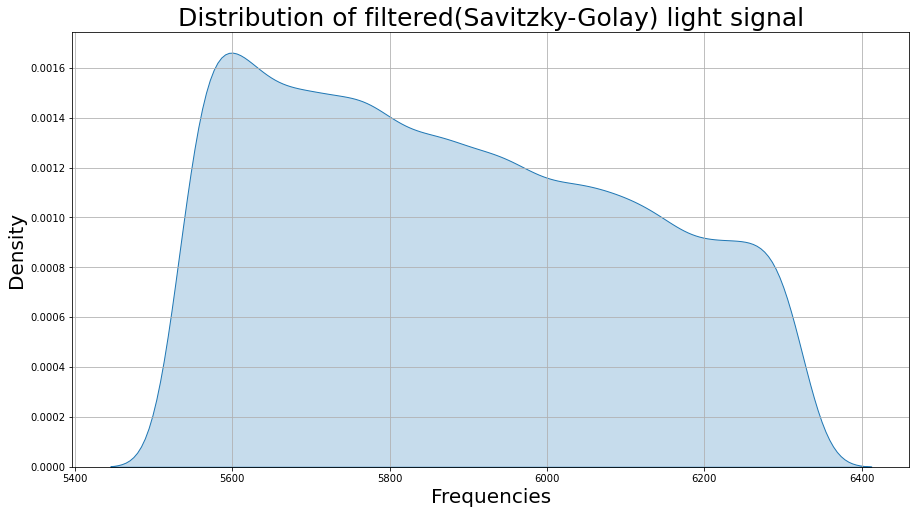

In [257]:
df3.drop('light_sig', axis=1, inplace=True)
df3['light_sig'] = smoothed_signal
plt.figure(figsize=figsize)
sns.kdeplot(df3.light_sig, shade=True)
plt.title('Distribution of filtered(Savitzky-Golay) light signal', fontsize=titlefont)
plt.xlabel('Frequencies', fontsize=subtitlefont)
plt.ylabel('Density', fontsize=subtitlefont)
plt.grid(True)

# End
I spent a lot of time detailing why I chose certain things or why not, I hope I was able to convey what was going through my mind and my ways of thinking and acting

Looking forward to the answers, Shabat Shalom :-)

Robi Bar